## Importing Library

In [1]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Loading Data


In [2]:
#Loading the data
df =pd.read_csv('Cars.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Shape of the data
df.shape

(8128, 13)

In [5]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [7]:
# Renaming the name to brand and splitting 
df.rename(columns ={
    'name':'brand'
}, inplace=True)

df['brand'] = df['brand'].str.split().str[0]
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


## Mapping

In [8]:
map={
       'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

In [9]:
df['owner']= df['owner'].map(map)

In [10]:
df['owner'].unique()

array([1, 2, 3, 4, 5])

## Removing all rows with CNG and LPG

In [11]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [12]:
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

In [13]:
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

## Removing "kmpl" and convert the column to numerical type 

In [14]:
df['mileage'].dtype

dtype('O')

In [15]:
df['mileage']=df.mileage.str.split().str[0]

In [16]:
df['mileage']=df['mileage'].astype(float)

In [17]:
df['mileage'].dtypes

dtype('float64')

## Removing CC and convert column to numerical type

In [18]:
df['engine']=df['engine'].str.split().str[0]

In [19]:
df['engine'].head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: object

## Max Power

In [20]:
df['max_power']=df.max_power.str.split().str[0]

In [21]:
df['max_power'].head()

0        74
1    103.52
2        78
3        90
4      88.2
Name: max_power, dtype: object

In [22]:
df=df.drop(['torque'],axis=1)

In [23]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497,78,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.2,5.0


## Removing Owner

In [24]:
df = df[df['owner'] != 5]

In [25]:
df['owner'].unique()

array([1, 2, 3, 4])

In [26]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497,78,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.2,5.0


In [27]:
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['fuel'].unique())


['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['Diesel' 'Petrol']


In [28]:
df_copy=df
df_copy.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497,78,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.2,5.0


## Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder_brand = LabelEncoder()
label_encoder_fuel = LabelEncoder()
label_encoder_transmission = LabelEncoder()
label_encoder_seller_type = LabelEncoder()

df['brand'] = label_encoder_brand.fit_transform(df['brand'])
df['fuel'] = label_encoder_fuel.fit_transform(df['fuel'])
df['transmission'] = label_encoder_transmission.fit_transform(df['transmission'])
df['seller_type'] = label_encoder_seller_type.fit_transform(df['seller_type'])

df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,1,1,1,23.40,1248,74,5.0
1,27,2014,370000,120000,0,1,1,2,21.14,1498,103.52,5.0
2,10,2006,158000,140000,1,1,1,3,17.70,1497,78,5.0
3,11,2010,225000,127000,0,1,1,1,23.00,1396,90,5.0
4,20,2007,130000,120000,1,1,1,1,16.10,1298,88.2,5.0


In [30]:
label_encoder_fuel.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [31]:
# Fuel mapping
fuel_mapping = dict(zip(label_encoder_fuel.classes_, label_encoder_fuel.transform(label_encoder_fuel.classes_)))
print("Fuel mapping:", fuel_mapping)

# Seller Type mapping
seller_type_mapping = dict(zip(label_encoder_seller_type.classes_, label_encoder_seller_type.transform(label_encoder_seller_type.classes_)))
print("Seller Type mapping:", seller_type_mapping)

# Transmission mapping
transmission_mapping = dict(zip(label_encoder_transmission.classes_, label_encoder_transmission.transform(label_encoder_transmission.classes_)))
print("Transmission mapping:", transmission_mapping)


Fuel mapping: {'Diesel': np.int64(0), 'Petrol': np.int64(1)}
Seller Type mapping: {'Dealer': np.int64(0), 'Individual': np.int64(1), 'Trustmark Dealer': np.int64(2)}
Transmission mapping: {'Automatic': np.int64(0), 'Manual': np.int64(1)}


## EXPLORATORY DATA ANALYSIS

In [32]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [33]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,1,1,1,23.40,1248,74,5.0
1,27,2014,370000,120000,0,1,1,2,21.14,1498,103.52,5.0
2,10,2006,158000,140000,1,1,1,3,17.70,1497,78,5.0
3,11,2010,225000,127000,0,1,1,1,23.00,1396,90,5.0
4,20,2007,130000,120000,1,1,1,1,16.10,1298,88.2,5.0


## Univarite Analysis

### Discreate Data

<Axes: xlabel='seller_type', ylabel='count'>

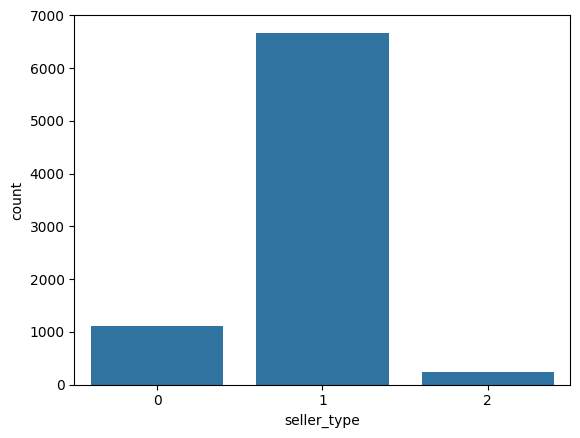

In [34]:
sns.countplot(data=df,x='seller_type')

#Here 

<Axes: xlabel='fuel', ylabel='count'>

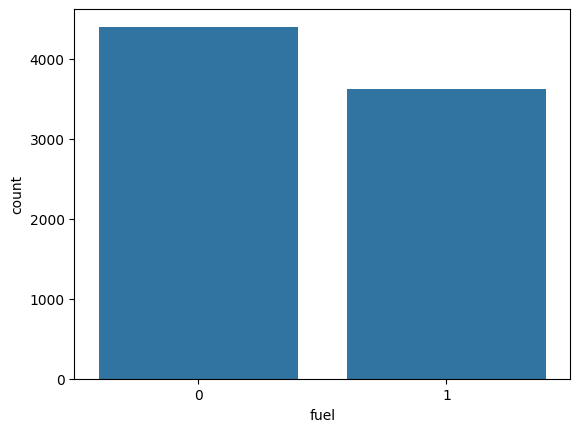

In [35]:
sns.countplot(data=df,x='fuel')

#Here 0 is petrol cars and 1 is diseal cars

<Axes: xlabel='transmission', ylabel='count'>

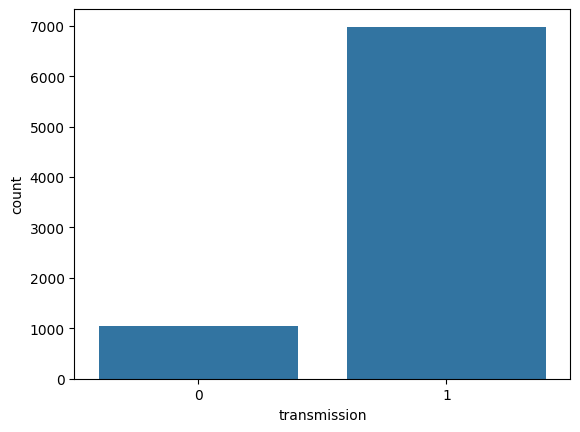

In [36]:
sns.countplot(data=df, x='transmission')


<Axes: xlabel='owner', ylabel='count'>

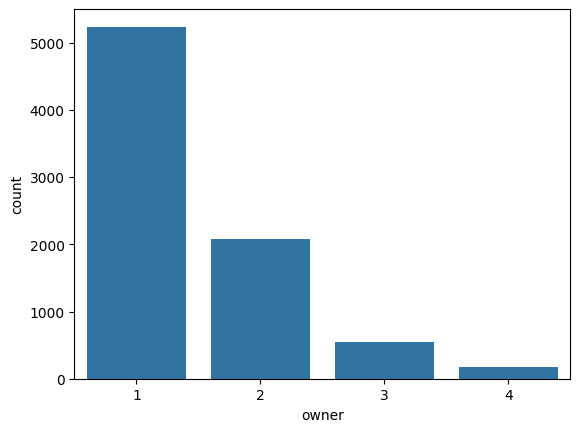

In [37]:
sns.countplot(data=df,x='owner')

<Axes: xlabel='seats', ylabel='count'>

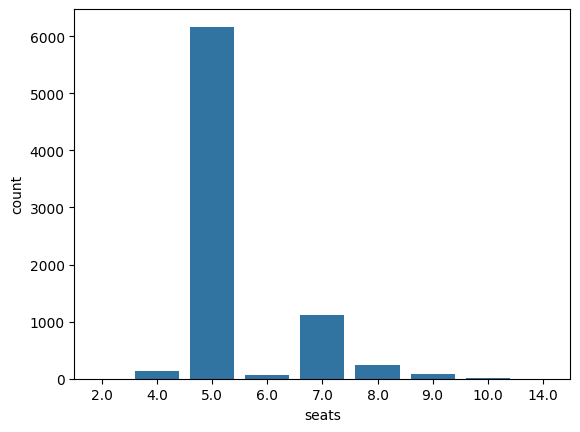

In [38]:
sns.countplot(data=df,x='seats')

### Continous Data

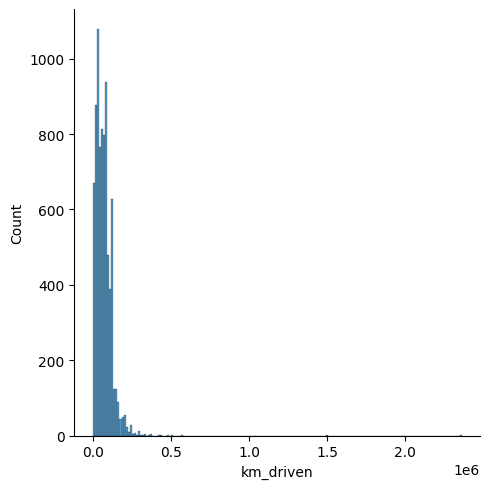

In [39]:
sns.displot(data = df, x = 'km_driven')

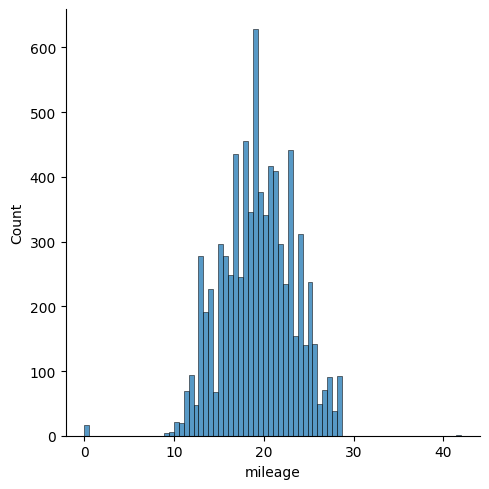

In [40]:
sns.displot(data=df,x='mileage')

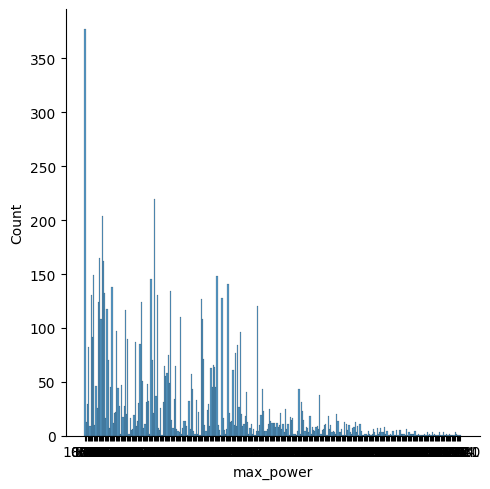

In [41]:
sns.displot (data=df,x='max_power')

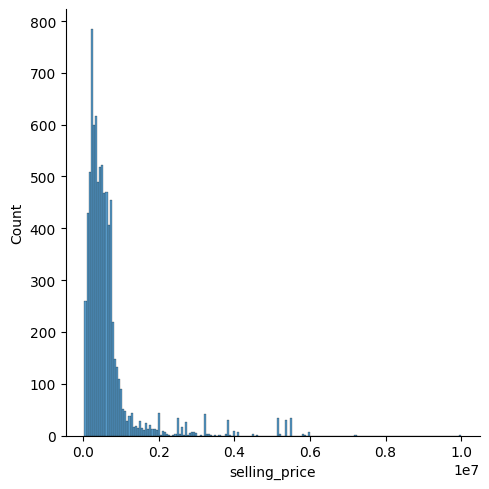

In [42]:
sns.displot (data=df,x='selling_price')

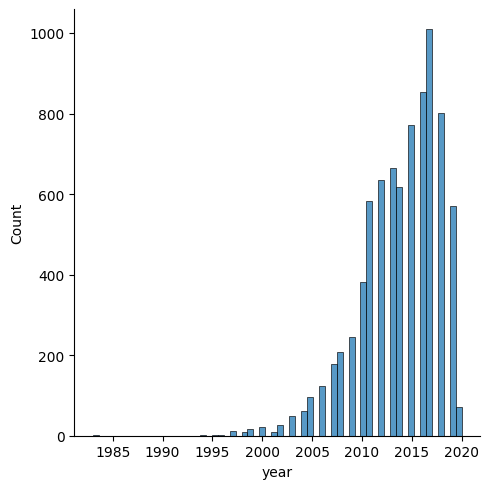

In [43]:
sns.displot(data=df,x='year')

## Multivarte Analysis

In [44]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

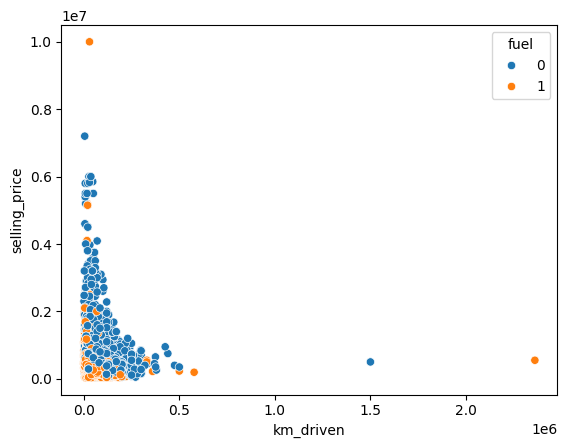

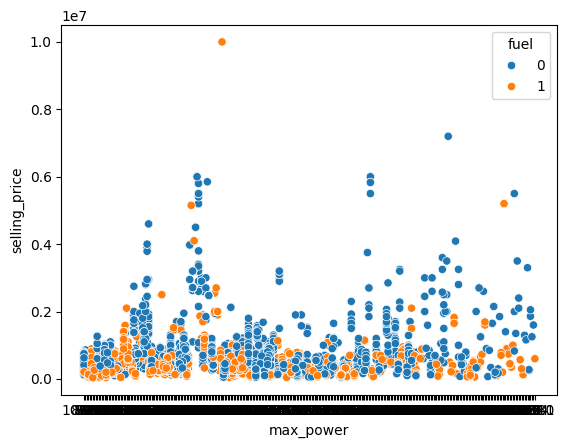

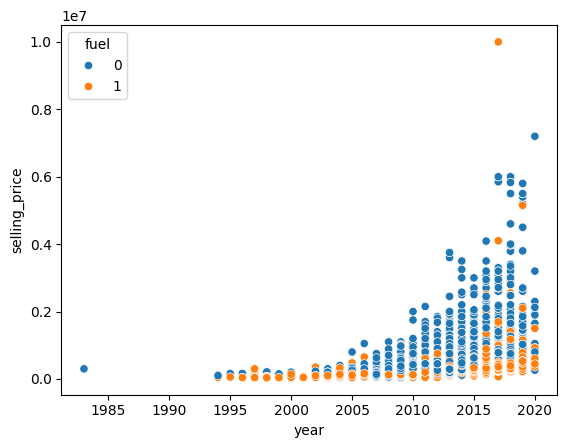

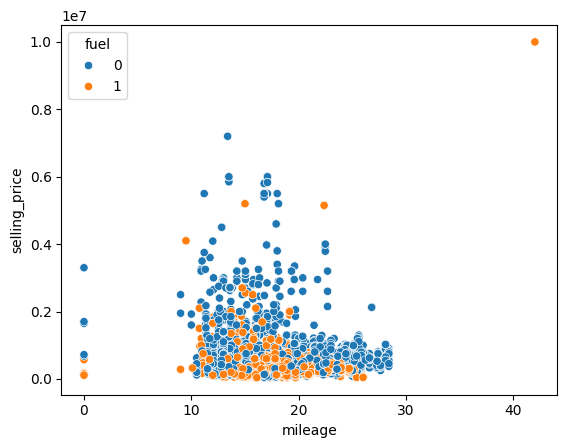

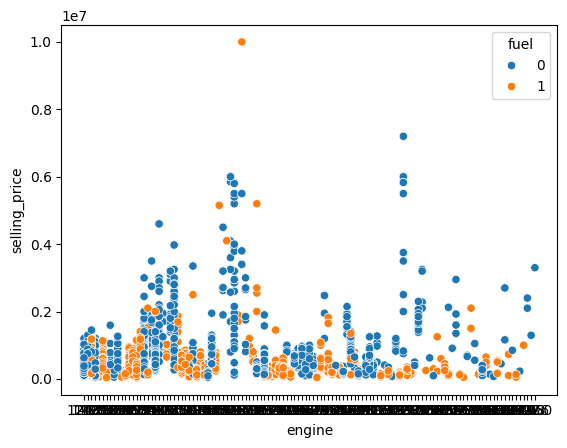

In [45]:
continuous_cols = [ 'km_driven', 'max_power','year','mileage','engine']

for col in continuous_cols:
    sns.scatterplot(data=df, x=col, y='selling_price', hue='fuel')
    plt.show()

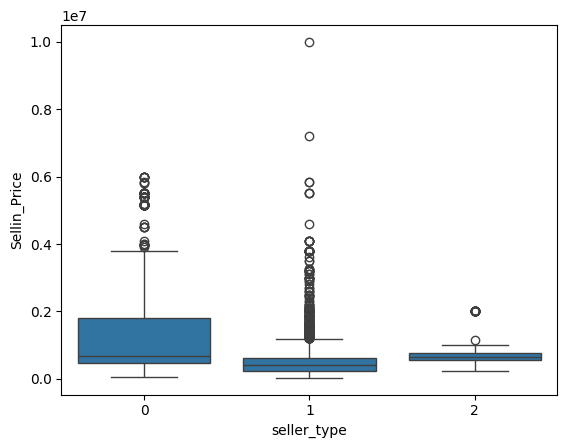

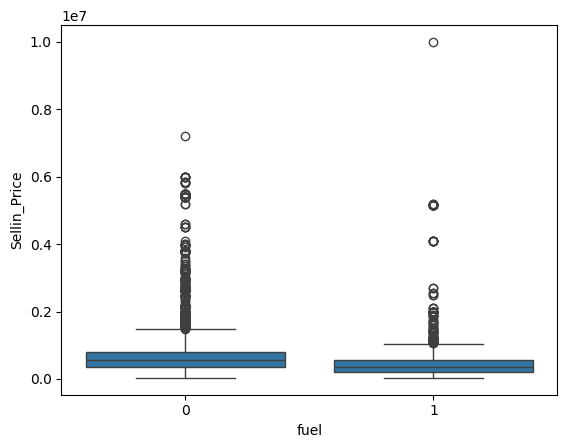

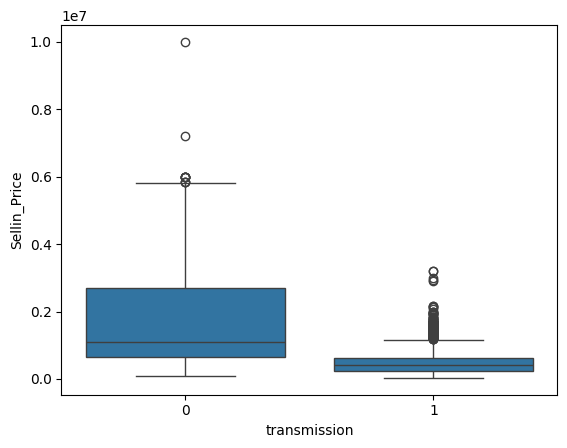

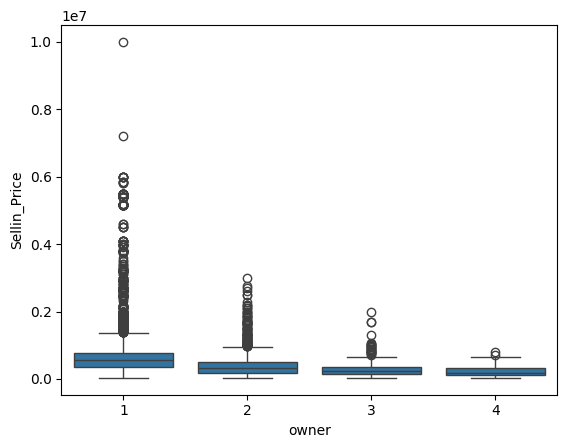

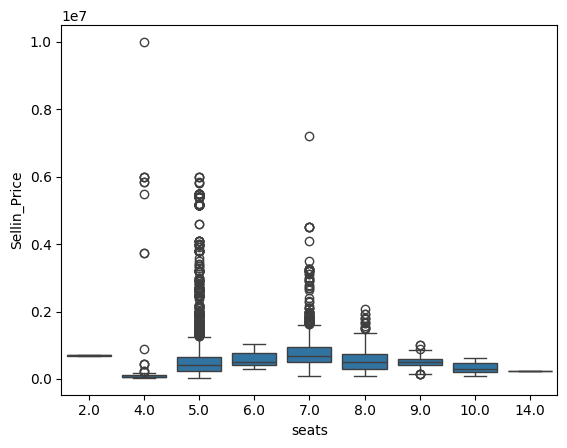

In [46]:
discrete_cols = ['seller_type', 'fuel', 'transmission', 'owner','seats']

for dis in discrete_cols:
    sns.boxplot(x=dis, y='selling_price', data=df)
    plt.ylabel('Sellin_Price')
    plt.xlabel(dis)
    plt.show()



## Colrelation Matrix

<Axes: >

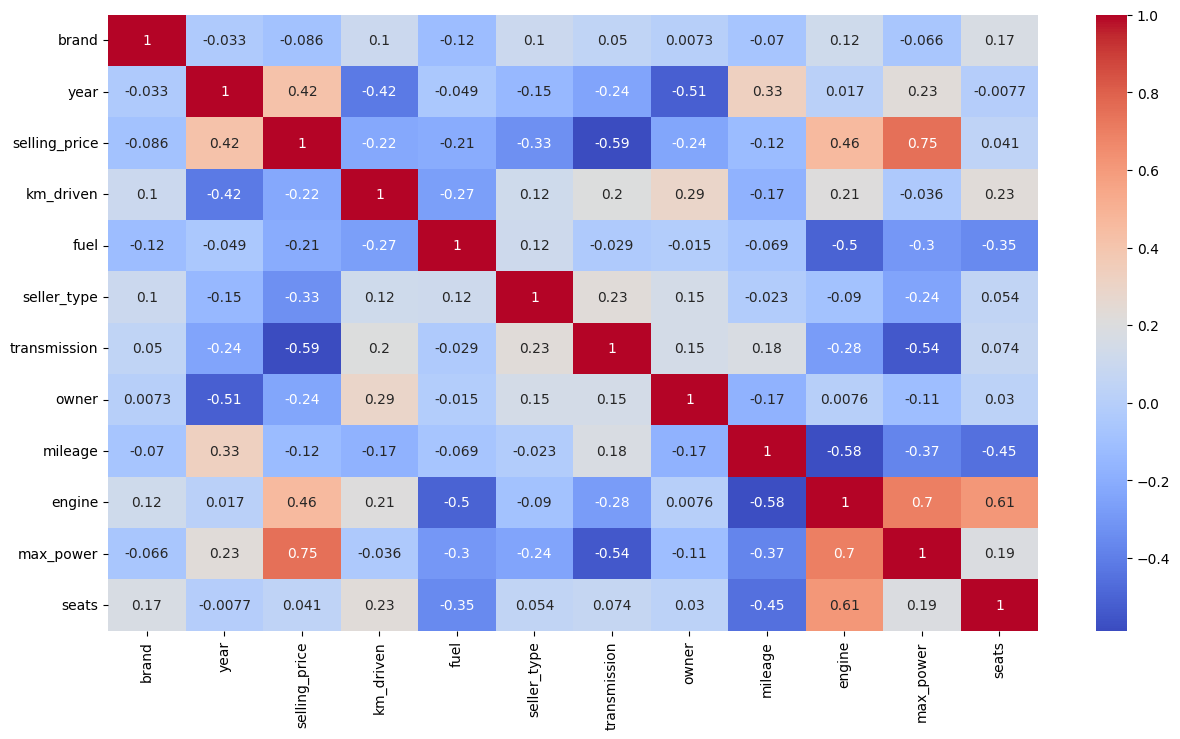

In [47]:
plt.figure(figsize=(15,8))

#Checking out the heat map
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## Feature Selection

In [48]:
X=df[['max_power','mileage','fuel','brand','year','km_driven']]

y = np.log(df['selling_price'])

## Splitting the data into test and train sets

In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Preprocessing 

### Null Value

In [50]:
missing_values_X_train = X_train.isna().sum()
print(missing_values_X_train)

max_power    165
mileage      171
fuel           0
brand          0
year           0
km_driven      0
dtype: int64


In [51]:
missing_values_X_test= X_test.isna().sum()
print(missing_values_X_test)

max_power    43
mileage      43
fuel          0
brand         0
year          0
km_driven     0
dtype: int64


In [52]:
y_train.isna().sum()

np.int64(0)

In [53]:
y_test.isna().sum()

np.int64(0)

## Filling the missing value

Distribution of the missing values

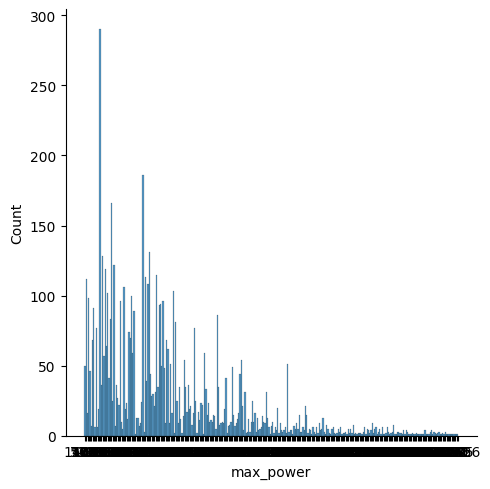

In [54]:
sns.displot(data=X_train,x='max_power')


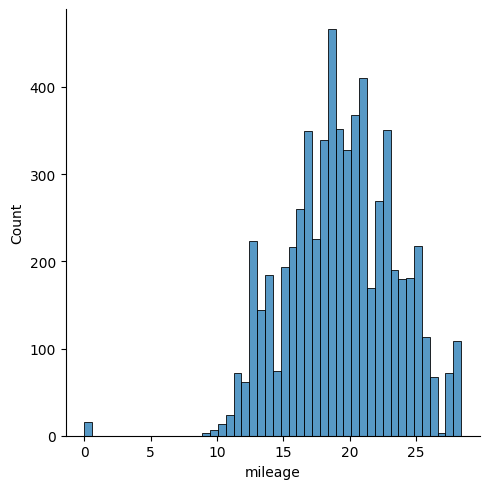

In [55]:
sns.displot(data=X_train,x='mileage')

In [56]:
#filling the missing value for Train data set
"""Converts invalid strings (like 'nan', '', 'unknown') to NaN
Keeps valid numeric strings as numbers
Prevents errors from stopping the conversion"""


X_train['max_power'] = pd.to_numeric(X_train['max_power'], errors='coerce')
X_train['mileage'] = pd.to_numeric(X_train['mileage'], errors='coerce')

X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)


In [57]:

X_test['max_power'] = pd.to_numeric(X_test['max_power'], errors='coerce')
X_test['mileage'] = pd.to_numeric(X_test['mileage'], errors='coerce')



X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)


In [58]:
missing_values_X_train = X_train.isna().sum()
print(missing_values_X_train)

missing_values_X_test= X_test.isna().sum()
print(missing_values_X_test)

max_power    0
mileage      0
fuel         0
brand        0
year         0
km_driven    0
dtype: int64
max_power    0
mileage      0
fuel         0
brand        0
year         0
km_driven    0
dtype: int64


In [59]:
y_test.isna().sum(), y_train.isna().sum()

(np.int64(0), np.int64(0))

## Scaling

In [60]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [61]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 6)
Shape of X_test:  (1606, 6)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


## Modeling

In [62]:

import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://localhost:5001")

os.environ["LOGNAME"] = "Samir"

mlflow.set_experiment(experiment_name="Car_Price_Predication_v2")



<Experiment: artifact_location='/mlruns/756801616543862577', creation_time=1757229263952, experiment_id='756801616543862577', last_update_time=1757229263952, lifecycle_stage='active', name='Car_Price_Predication_v2', tags={}>

In [63]:
from sklearn.model_selection import KFold  

In [64]:
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




class LinearRegression(object):
    def __init__(self, regularization, 
                 lr=0.001, method='batch', init='xavier', polynomial=True, degree=3,
                 use_momentum=True, momentum=0.5, num_epochs=500, batch_size=50,
                 cv=None, n_splits=3, shuffle=True, random_state=None):

        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.polynomial = polynomial
        self.degree     = degree
        self.init       = init
        self.use_momentum   = use_momentum
        self.momentum   = momentum
        self.prev_step  = 0
        self.regularization = regularization

        # Cross-validation splitter
        if cv is None:
            self.cv = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
        else:
            self.cv = cv

    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    def r2(self, ytrue, ypred):
        return 1 - ((ytrue - ypred) ** 2).sum() / ((ytrue - ytrue.mean()) ** 2).sum()
    def avgMse(self):
        return np.sum(np.array(self.kfold_scores))/len(self.kfold_scores)

    def avgr2(self):
        return np.sum(np.array(self.kfold_r2))/len(self.kfold_r2)
    
    def fit(self, X_train, y_train):

        # self.columns = X_train.
        # Store column names first
        if hasattr(X_train, "columns"):
            self.columns = X_train.columns
        else:
            self.columns = [f"x{i}" for i in range(X_train.shape[1])]

        # Convert to numpy arrays
        X_train = np.array(X_train)
        y_train = np.array(y_train).ravel()  # flatten target
        
        # Polynomial expansion if needed
        if self.polynomial:
            X_train = self._transform_features(X_train)
            print("Using Polynomial")
        else:
            print("Using Linear")


        self.kfold_scores = list()

        self.kfold_r2 = []
        
        #reset val loss
        self.val_loss_old = np.inf


        #kfold.split in the sklearn.....
        #5 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            #initialize weights using Xavier method
            if self.init == 'xavier':
                #calculate the range for the weights with number of samples
                lower, upper = -(1 / np.sqrt(X_cross_train.shape[1])), 1 / np.sqrt(X_cross_train.shape[1])
                #randomize weights then scale them using lower and upper bounds
                self.theta = np.random.rand(X_cross_train.shape[1])
                self.theta = lower + self.theta * (upper - lower)

            #initialize weights with zero
            elif self.init == 'zero':
                self.theta = np.zeros(X_cross_train.shape[1])

            else:
                print("Wrong weights init method. Must be either 'xavier' or 'zero'")
                return
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {
                    "method": self.method,
                    "lr": self.lr,
                    "reg": type(self).__name__
                }
                
                mlflow.log_params(params=params)
        
                for epoch in range(self.num_epochs):                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx].reshape(1, )
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)                    
    
                    yhat_val = self._predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    val_r2_new = self.r2(y_cross_val, yhat_val)
                        
                        #record dataset
                    mlflow_train_data = mlflow.data.from_numpy(features=X_method_train, targets=y_method_train)
                    mlflow.log_input(mlflow_train_data, context="training")
                    
                    mlflow_val_data = mlflow.data.from_numpy(features=X_cross_val, targets=y_cross_val)
                    mlflow.log_input(mlflow_val_data, context="validation")
                    
                    # early stopping
                    
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
                
                self.kfold_scores.append(val_loss_new)
                self.kfold_r2.append(val_r2_new)
                print(f"Fold {fold}: MSE {val_loss_new}")
                print(f"Fold {fold}:R2 {val_r2_new}")

    def _transform_features(self, X):
        # Transform input features to include polynomial terms
        X_poly = np.column_stack([X ** i for i in range(1, self.degree + 1)])
        return X_poly
            
                    
    def _train(self, X, y):
        yhat = self._predict(X)
        m    = X.shape[0]    
        if self.regularization:    
            grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        else:
            grad = (1/m) * X.T @(yhat - y)

        if self.use_momentum == True:
            self.prev_step = self.momentum * self.prev_step - self.lr * grad
            self.theta = self.theta + self.prev_step
        else:
            self.theta = self.theta - self.lr * grad

        return self.mse(y, yhat)
    
    def _predict(self, X):
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def predict(self, X):
        if self.polynomial == True:
            X = self._transform_features(X)
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]

    def feature_importance(self, width=5, height=10):
        coefs = pd.DataFrame(data=self.theta, columns=['Coefficients'], index=self.columns)
        coefs.plot(kind="barh", figsize=(width, height))
        plt.title("Feature Importance")
        plt.show()

class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)

# Define classes for Lasso, Ridge, ElasticNet, and Normal (No Regularization) linear regression
class Lasso(LinearRegression):
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class Ridge(LinearRegression):
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class ElasticNet(LinearRegression):
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class Normal(LinearRegression):  
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum):
        self.regularization = None  # No regularization
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

In [65]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)


In [67]:
regs = ["Ridge", "Lasso", "ElasticNet"]

# Looping through all regression methods
for reg in regs:
    #Hard quoting other params
    params = {"method": "batch", "l": 0.1, "lr": 0.1,  "polynomial": True, "init" :"xavier", 
    "use_momentum" :True,  "momentum":0.5, "degree":3}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}", nested=True)
    
    print("="*5, reg, "="*5)

    #Specifying the type of regression and setting up the model based on it
    type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
    #Passing the params 
    model = type_of_regression(**params)
    #Fitting the model
    model.fit(X_train, y_train)
    #Calculating avgMse and r2 for the speicified params
    mse = model.avgMSE()
    r2 = model.avgr2()
    

    #Predicting using the model
    yhat = model.predict(X_train)    
    
    print("Test MSE: ", mse)
    print("Test R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Ridge =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b6c21a4c927948cea568b5d5272828ce
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/7df07c5b1787400f8c36e9b7523089d9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/4b6ca0694b014f60bf87de9c4dc4c534
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/11 23:14:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:14:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run method-batch-lr-0.1-reg-Ridge at: http://localhost:5001/#/experiments/756801616543862577/runs/5b269c3375814aef8b35b240538f5821
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Lasso =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/862e12418f384b2a81b7d8a4bf94db03
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/16561fbaa00c4f308c3dc57f3dbad32c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b8d4e40ff96841d993ea127a30092a14
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/11 23:15:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:15:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run method-batch-lr-0.1-reg-Lasso at: http://localhost:5001/#/experiments/756801616543862577/runs/8ef891ae77664a14ba86e37114ff24e4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== ElasticNet =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/20ce81897c57492fa992a42146dc05ed
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/26b1896f6a364ebdaff85d4ebf479bba
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f905b52f104947529fd4ea4e1e6ea08a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/11 23:15:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:15:50 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run method-batch-lr-0.1-reg-ElasticNet at: http://localhost:5001/#/experiments/756801616543862577/runs/cc769a811d184331a670d4a714a377f0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577


In [68]:
# Settting up the experiment of polynomial and regularization type all others are hard quoted
regs = ["Ridge", "Lasso", "ElasticNet","Normal"]
ispoly= [True, False]

for reg in regs:
    for t in ispoly:

        params = {"method": "batch","polynomial": t,  "lr": 0.1, "l": 0.1, "init" :"xavier", 
        "degree":3, "use_momentum" :True,  "momentum":0.5}
        # mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}", nested=True)
        
        print("="*5, reg, "="*5)

        type_of_regression = str_to_class(reg)   
        model = type_of_regression(**params)  
        model.fit(X_train, y_train)
        yhat = model.predict(X_train)
        mse = model.avgMSE()
        r2 = model.avgr2()
        

        print("Test MSE: ", mse)
        print("Test R2: ", r2)

        mlflow.log_metric(key="test_mse", value=mse)
        mlflow.log_metric(key="test_r2", value=r2)

        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Ridge =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/49ca35c3bc384f64ab65aa61a38241de
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c88a9c2b315d412c82371fdd08e7ea1e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/208345eb40614bd9b5192de8c83fe2bb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/11 23:16:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:16:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


===== Ridge =====
Using Linear
Fold 0: MSE 168.48914862186177
Fold 0:R2 -232.57786339798938
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e1da775b9fd34264a4cf1c5e03e65dc1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.7440256265061
Fold 1:R2 -243.56477804815145
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/70aa0057a7ca452ab5bcea01000bb1f8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.03696572396257
Fold 2:R2 -244.95229987116133
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/89cd0151b3d740238302497ecc827b6f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  168.75671332411014
Test R2:  -240.36498043910072


2025/09/11 23:16:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:16:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run method-batch-lr-0.1-reg-Ridge at: http://localhost:5001/#/experiments/756801616543862577/runs/e71ef2e325ea46cbad53dad208dcf782
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Lasso =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/cd77fdebffea4748864c0f91ae7fed65
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/cfcf7ff08cc14b76ad456b1b317df95f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/eba0ab289fa34c779d444ce3249abb2d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/11 23:16:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:17:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


===== Lasso =====
Using Linear
Fold 0: MSE 168.9126540133237
Fold 0:R2 -242.5832694617489
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/3110393a1265438183ebee8eac984118
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.43542818853186
Fold 1:R2 -245.46013557631906
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9fb7334c0bab49f0b8132862011b56d4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.60851954765005
Fold 2:R2 -234.37711559636728
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/593bc66b7b8447f4b581e880fcf2051c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  168.98553391650185
Test R2:  -240.8068402114784


2025/09/11 23:17:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:17:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run suave-kit-447 at: http://localhost:5001/#/experiments/756801616543862577/runs/cc2fbd35e438432dac3b2f59be42e76f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== ElasticNet =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5cee2c64ed7c4ecfb1aa17dd0b78b9f7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e2953d49cdf447b09187f50f15bb9a22
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/265bed3db6b842e386f2f62438db3209
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/11 23:17:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:17:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


===== ElasticNet =====
Using Linear
Fold 0: MSE 169.08856807142504
Fold 0:R2 -229.61265103136148
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7a53ca35e343461d8f3079fa23b7ab1d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.8829403192785
Fold 1:R2 -250.65659555026068
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/11e01a40561744bab614630142bcaf3b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.42521178087406
Fold 2:R2 -242.9782427940769
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d4eb3a023a664ad3aaba7ed0edb76a1e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  169.13224005719255
Test R2:  -241.08249645856634


2025/09/11 23:18:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:18:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run gifted-seal-477 at: http://localhost:5001/#/experiments/756801616543862577/runs/6de40da891834de1bb26194d9025dc52
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Normal =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/fc7601db65b94e6490bbfa609871cbca
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e853646ff275498e89d1889819b08c54
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c389cdd022084e26a1c87b73d2d79c0c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/11 23:18:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:19:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


===== Normal =====
Using Linear
Fold 0: MSE 169.15569633008332
Fold 0:R2 -245.51168313133695
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/0c38a619245546faa00b33c9b3a4db91
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.61294214228982
Fold 1:R2 -247.91423477917334
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3240b063744d460dba51182181085e88
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.66946486504568
Fold 2:R2 -229.72498442258131
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1465fdd95cf747cb8eba18e4fc7f9835
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  169.1460344458063
Test R2:  -241.0503007776972


2025/09/11 23:19:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:19:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run adaptable-swan-376 at: http://localhost:5001/#/experiments/756801616543862577/runs/3d0abe0860784186a0e57f7ee43034f1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577


In [69]:
reg = "Normal"
ispoly= False
# Only testing with the method here
methods=["mini","batch","sto"]

for method in methods:
    params = {"method": method,"polynomial": ispoly,  "lr": 0.1, "l": 0.1, "init" :"xavier", 
    "degree":3, "use_momentum" :True,  "momentum":0.5}
    # mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method: ", method)

    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()

    print("Test MSE: ", mse)
    print("Test R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Normal =====
Method:  mini
Using Linear
Fold 0: MSE 169.02154407283572
Fold 0:R2 -251.78783084202865
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/241c9259966949d499b8828474295f1d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 170.3401011491787
Fold 1:R2 -242.214062181818
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a146d78bc626401185ee73e6e580a1a9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 171.69249778949882
Fold 2:R2 -234.7527364883552
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/3fddb57e299a4cf29b7e4765cc882b9e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  170.35138100383776
Test R2:  -242.9182098374006


2025/09/11 23:23:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:23:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run abundant-turtle-681 at: http://localhost:5001/#/experiments/756801616543862577/runs/0d2e6aaccd0f42e98269e54be419d9e0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Normal =====
Method:  batch
Using Linear
Fold 0: MSE 169.1368943784315
Fold 0:R2 -228.27899230913832
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f2d3c2a263d24fd8a47a177154811253
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.79205921043308
Fold 1:R2 -244.74465027251318
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a9e107d5be064d299751804e334dc27b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.68736678961787
Fold 2:R2 -249.45667357116434
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b332a90350904dc380a477a7a69020a9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616

2025/09/11 23:24:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:24:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run unequaled-sloth-610 at: http://localhost:5001/#/experiments/756801616543862577/runs/2fb845f6337f4714b049f3d2bd5488c5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Normal =====
Method:  sto
Using Linear
Fold 0: MSE 277.4527111204796
Fold 0:R2 -410.2119546991589
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9940a1057f504a5ba7c2a9320aa3d3f3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 29597.437471711743
Fold 1:R2 -41815.77169500581
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/112b18ed004d48e0b757c0f5d5ba1da8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 1306.34561476799
Fold 2:R2 -1821.7263536138737
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8a8e67188af24cfa86851a3abda267f8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862

2025/09/11 23:32:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:32:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run judicious-gull-491 at: http://localhost:5001/#/experiments/756801616543862577/runs/4ff5ab6d0eef46d0bd828affcab8481e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577


In [70]:
reg = "Normal"
ispoly= False
method="sto"
# Only testing with/without momentum here
momentums =[True, False]

for momentum in momentums:
    params = {"method": method,"polynomial": ispoly,  "lr": 0.1, "l": 0.01, "init" :"xavier", 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    # mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{ispoly}-momentum-{momentum}", nested=True)    
    print("="*5, reg, "="*5)
    print("Method: ", method)
    print("Momentum: ", momentum)
    print("Inititalization: ", "Xavier")
    print("Learning Rate: ", "0.1")
    print("="*10)

    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()

    print("Test MSE: ", mse)
    print("Test R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Normal =====
Method:  sto
Momentum:  True
Inititalization:  Xavier
Learning Rate:  0.1
Using Linear
Fold 0: MSE 737.8038317348886
Fold 0:R2 -1032.8051172725975
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/861127a000de4de9a89ef345362f148b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 1075.5363711008263
Fold 1:R2 -1574.697599924467
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5ed06094ad3d47dba2a1536e6965dcc4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 4852.344662826258
Fold 2:R2 -6902.807760382133
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e61aed675d344b37aaa21c49a78c73d3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  2221.8949552206577
Test R2:  -3170.1034925263994


2025/09/11 23:40:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:40:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run illustrious-ox-79 at: http://localhost:5001/#/experiments/756801616543862577/runs/92faacde91634c45a836372393110328
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Normal =====
Method:  sto
Momentum:  False
Inititalization:  Xavier
Learning Rate:  0.1
Using Linear
Fold 0: MSE 240.9906021033665
Fold 0:R2 -347.03369355909695
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c2f53704aff443cb86fb07f972f19dd2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 220.58222255943346
Fold 1:R2 -303.4523707395995
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9c71953e1e014e298174edc0848d4fb0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 279.06467977791146
Fold 2:R2 -408.9710492684049
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/61c69d4536bb438783cd5dedfb43f8e6
🧪 View expe

2025/09/11 23:48:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:48:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run casual-auk-812 at: http://localhost:5001/#/experiments/756801616543862577/runs/a30a3aa28c934347865422d79914fe84
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577


In [71]:
reg = "Normal"
ispoly= False
method="mini"
momentum =False
# Only testing diff initialization here
inits=["zero",'xavier']

for init in inits:
    params = {"method": method,"polynomial": ispoly,  "lr": 0.1, "l": 0.1, "init" :init, 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    # mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}-momentum-{momentum}-init-{init}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method: ", method)
    print("Momentum: ", momentum)
    print("Inititalization: ", init)
    print("Learning Rate: ", "0.1")
    print("="*10)
    type_of_regression = str_to_class(reg)   
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()
    print("Test MSE: ", mse)
    print("Test R2: ", r2)
    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)
    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    mlflow.end_run()

===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  zero
Learning Rate:  0.1
Using Linear
Fold 0: MSE 169.60341436646448
Fold 0:R2 -237.52039595099848
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/bb1ef71c5fba43a0b8b6503191853bd6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.27667019130666
Fold 1:R2 -237.47712355276244
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/0c1f09db4d014189b23cb4122d1238f7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.39978606370784
Fold 2:R2 -248.30612027501755
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/28cd44c460634cb08631ff139e2daed4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  169.09329020715967
Test R2:  -241.1012132595928


2025/09/11 23:53:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:53:22 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run burly-grub-457 at: http://localhost:5001/#/experiments/756801616543862577/runs/cfaaed9aff9148a6a58d1598f0b95a5e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  xavier
Learning Rate:  0.1
Using Linear
Fold 0: MSE 168.76326058140225
Fold 0:R2 -234.93117699733932
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d123003c721d4652b8ea3fb0c13ef85a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.94806572747916
Fold 1:R2 -238.5633705847498
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5a81bcff0c7545dc89e93a1d3d24fbfb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.09314477027723
Fold 2:R2 -248.226464917958
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0cd2a7951c3d488993149444cbe9fa00
🧪 View experi

2025/09/11 23:58:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/11 23:58:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run suave-eel-353 at: http://localhost:5001/#/experiments/756801616543862577/runs/e5759e5b9e7a4c6594e6eeb869bb058f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577


In [72]:
reg = "Normal"
ispoly= False
method="mini"
momentum =False
init='xavier'
# Only testing diff learning rate here
lrs =[0.01,0.001,0.0001] 

for lr in lrs:
    params = {"method": method,"polynomial": ispoly,  "lr": lr, "l": 0.1, "init" :init, 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}-momentum-{momentum}-init-{init}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method: ", method)
    print("Momentum: ", momentum)
    print("Inititalization: ", init)
    print("Learning Rate: ", lr)
    print("="*10)


    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()

    print("Test MSE: ", mse)
    print("Test R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    

    mlflow.end_run()

===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  xavier
Learning Rate:  0.01
Using Linear
Fold 0: MSE 168.76635491360406
Fold 0:R2 -230.53620100381684
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4184f596927c4add9d76822d4f68b833
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.98977086850053
Fold 1:R2 -260.5694580146033
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/1b0ae4f1a3794fb1ba6936d4d3b103f9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.23309548371418
Fold 2:R2 -232.94360854905614
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/9b7098f4cff3436d99608be60940335e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  168.99640708860628
Test R2:  -241.34975585582546
🏃 View run method-mini-lr-0.01-reg-Normal-poly-False-momentum-False-init-

In [73]:
regs = ["Ridge", "Lasso", "ElasticNet", "Normal"]
ispoly = [True, False]
lrs = [0.01, 0.001, 0.0001]
methods = ["sto", "mini", "batch"]
inits = ['zero', 'xavier']
use_momentums = [True, False]

for reg in regs:
    print("="*5, reg, "="*5)
    for method in methods:
        print("="*5, method, "="*5)
        for t in ispoly:
            print("Polynomial" if t else "Linear")
            for init in inits:
                print("="*5, init, "="*5)
                for use_momentum in use_momentums:
                    momentum = "Momentum Used" if use_momentum else "Momentum not used"
                    print("="*5, momentum, "="*5)
                    for lr in lrs:
                        print("="*5, lr, "="*5)
                        params = {
                            "method": method,
                            "polynomial": t,
                            "lr": lr,
                            "l": 0.1,
                            "init": init,
                            "degree": 3,
                            "use_momentum": use_momentum,
                            "momentum": 0.5
                        }

                        # Start MLflow run
                        mlflow.start_run(
                            run_name=f"method-{method}-lr-{lr}-reg-{reg}-poly-{t}-momentum-{momentum}-init-{init}", 
                            nested=True
                        )

                        type_of_regression = str_to_class(reg)
                        model = type_of_regression(**params)
                        model.fit(X_train, y_train)
                        yhat = model.predict(X_train)
                        mse = model.avgMSE()
                        r2 = model.avgr2()

                        print("Test MSE: ", mse)
                        print("Test R2: ", r2)

                        # ONLY log metrics and model
                        mlflow.log_metric("test_mse", mse)
                        mlflow.log_metric("test_r2", r2)
                        mlflow.sklearn.log_model(model, "model")

                        mlflow.end_run()


===== Ridge =====
===== sto =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f2d49e60b872412286e1bedc8b413f33
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9a8b0ec6bbaf4766a96b7e4561915440
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/cc771f7ebb714ed0a79fe9b55db28d0a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  nan
Test R2:  nan


2025/09/12 00:07:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:07:34 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:07:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/8615c4068eb84db38f907a928a140fe8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/296051f8ace544e68cc2c9f15121288c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/94eb11f009b04cfaac35b0c3cd354a09
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/2c40acc8c14d477996ddbc67f120bf0c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 00:07:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:07:48 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:07:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/4dd128143934483bbfca22d5555d0f7d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/34b78fcd632f47b7b925d69c8017c584
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6f1a23d97b89416c8e98f13b1acfd495
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7e8578e057bc46ad9fd3c5fee65aef66
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 00:08:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:08:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:08:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/f116419b31184c3db313e7b8c7ae5ee3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE nan
Fold 0:R2 nan
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e077c40a4ff649c3bbe14327ec9b68df
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/caea6335bab84dcdbd8b9bb9ae4739bd
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f534ce2ebf344b19993615b8b1b478b1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE: 

2025/09/12 00:13:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:13:44 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:13:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/3287e550c53d417aa1ec4cc5e734dbb4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/32a7016fe45c48788b85c26a3d870fe5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ca43d729d3384041baf029902cca853b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ac8c5d25d6e8432286c5f1daf4ef1e2c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 00:14:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:14:07 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:14:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/a318bdf333cd468b8011641f6150e856
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1004da6e1e66418289ddedb1089d4880
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9eb92ce3d91f400ab39d76eb4d8c143e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b350091a768c44fe8cb0e78f78ca4e60
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 00:14:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:14:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:14:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/04d4c8ed5daf44599b76de87af4e66c4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/bea866773d934801945d46f816a45974
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8075d98dce954fcca14ef5271c213a79
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e8515155da534df6912b38795304a4c5
🧪 View experiment at: http://localhost:5001/#/experiments/7568016165

2025/09/12 00:20:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:20:13 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:20:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/2bb68e77dff14960a2ccabf051693359
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c09fd0a7ec244fa9940379e9e6f9707d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/cc320beb9c7e495d857945de087a0bba
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6524972f29d742d7b0b3a9a50def0b04
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 00:20:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:20:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:20:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/4dfe9f9037ec46f5857126c5db488616
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5b5972517a8744149bf597caf967974b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d97dce96299142dcbb099a9c8314500a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/60a5c8c023264bf7960a9e83e847aa51
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 00:20:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:21:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:21:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/0eeba793cd2345b2abe92acff966f952
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE nan
Fold 0:R2 nan
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4e0655cc5074487a9040b509e854cab3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e3f7fc7e46ac4ecd85216011e4de1bcc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/53786068386f431aba4fc031c528ae59
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:

2025/09/12 00:28:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:28:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:28:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/a4b3b809405a4ee18277eb8f7dbbb9d0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/19fec40fc7c34c9eb13035670e76d0fc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2c5f734a4d06405facbd2396be99f26c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b1af8ce187014797b981eb6e1446729d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 00:29:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:29:13 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:29:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/d645080e77e64b7aa2717449861897cc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/810d396ac2e94d9f98fe2c48b50e6112
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/26454f7080a9445185788f98f8fa76f0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a4a755157be6435e90437f9dfaad84d5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 00:29:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:29:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:29:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/08b0ae34e2504b0d844cea7a7151685d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 190.2960816836549
Fold 0:R2 -271.99351473645163
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1ebee69976604b168ed48af6e55231cd
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 182.52487686616792
Fold 1:R2 -261.6216043893362
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5fd54c7c8ebe4531bca53cf900677de2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 176.65554870480562
Fold 2:R2 -248.9039063454519
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a61685db4

2025/09/12 00:37:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:38:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:38:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/14f707292991440e9e28fd5bde37de66
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.45767581532985
Fold 0:R2 -237.05420477133592
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ddf1f15c7638444c954de59e584c38e2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 170.13525152471627
Fold 1:R2 -239.8541094400675
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2ce7e1203e1743ab9151c4bd3e565420
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 172.49746221531439
Fold 2:R2 -253.60626780335954
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7832107e66d64d1e8c99a11ae561be82
🧪 View experiment at: http://l

2025/09/12 00:44:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:44:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:44:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/ddbe3451136a45839749a8e105d2d3ad
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.3886376346459
Fold 0:R2 -242.3536241404245
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6c8d400c3f7f4e10bd8ce8b1dcb1461f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.94112863237308
Fold 1:R2 -236.51923065466914
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/63f938c3bc7b441a9f0ffdcbe7dfdfcf
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.71747705900916
Fold 2:R2 -241.4267296865722
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d781e5b80a3c44c7bcb9ab1c5d63b56f
🧪 View experiment at: http://l

2025/09/12 00:45:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:45:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:45:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/e79e30f474cf4e8499ea598bef7a8e4e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 189.6978418512529
Fold 0:R2 -272.67890255987624
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4159298d19254d0a9e1cb5b8f75ce035
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 171.81208624443335
Fold 1:R2 -252.0632495173206
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3a867e9e485342ee9b7e9cd402edd519
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 172.75191859561602
Fold 2:R2 -236.57682177847758
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/25c7f21a27c444b894146aab71a84b9b


2025/09/12 00:52:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:52:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:52:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/9ade9bbed80a4671a5386bdb9a0a56fc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.89974388943875
Fold 0:R2 -234.28263085416887
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1fa7caaf4e3448d2ba44599d438031fd
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.88555113673888
Fold 1:R2 -230.80066045268822
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2b48a1cec04b4f9abd82731996725708
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.7410331249473
Fold 2:R2 -259.49613007692795
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/89bbf9bd75ce4be7aba577aaa3a7d673
🧪 View experiment at: http

2025/09/12 00:59:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 00:59:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 00:59:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/14b22ddb278e475687b708a8fac801cf
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.01572979873666
Fold 0:R2 -230.96652162935504
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b38d818040a3436fa984fb8abc72461f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.4999659462035
Fold 1:R2 -249.18446997338742
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a54cccc20f764b48b931995b1953125b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.80035010596262
Fold 2:R2 -241.5736854593925
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/712612caae194ce498ad06803761c6ee
🧪 View experiment at: htt

2025/09/12 01:00:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:00:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:00:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/aa485accf5cd40ca92306a3b9a4537b8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 171.5094204333616
Fold 0:R2 -248.39963658024527
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/15493ede45314ddcbbcb516ef6dcea17
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 175.87990614339353
Fold 1:R2 -243.60506466657412
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/78ba3364efaa48748821ebbc1cc6ce5b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.74616737928
Fold 2:R2 -245.74687009587913
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/85a534b19923457e

2025/09/12 01:08:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:08:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:08:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/b9ed9859f70649498b5734a018e33ebe
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.48725553245495
Fold 0:R2 -236.40590272942825
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/3a490c20f93045539c78969ea5f9693b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.690694190861
Fold 1:R2 -240.84485809735168
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d6b88fd5660a455aa91e6008d0407368
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.0477281464475
Fold 2:R2 -246.309862457349
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e0df7785b0c04ae38d75ab1b4a840d9b
🧪 View experiment at: http://loc

2025/09/12 01:14:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:14:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:14:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/9ab45f664e3b4be9a0d40065ae3acef6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.21056340968752
Fold 0:R2 -242.66049654024093
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4f2f5ae98a1e4cc4a7a74c013d6a9783
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.0500805670658
Fold 1:R2 -245.9535869535788
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8a96bf2928bd4ed8aee897b60b15fbb4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.80996359371701
Fold 2:R2 -233.66423049100948
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/476becead94947ce829a05fd2dc59543
🧪 View experiment at: http:

2025/09/12 01:15:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:15:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:15:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/dbd453cf868543009973c42a1f905dfb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 177.99782830523958
Fold 0:R2 -253.53987468917413
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9c5ae24151c446d38c77264acf13cdcb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 170.6971475832947
Fold 1:R2 -236.3949806575053
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6da09f5815204491970b48cf7c69abe1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 172.86908879195474
Fold 2:R2 -253.22069164488772
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/eaad8f8a990f45dab2324d1df37b357

2025/09/12 01:23:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:23:38 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:23:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/d52bf09bd8d140038a7208e6ac7369d6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.98134019750918
Fold 0:R2 -234.29663308188134
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9d1708f22665454fa48732be2bb33982
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.10869253440572
Fold 1:R2 -247.8486886584125
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/77e423b02623446e8c3e306097b51e2c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.40030366043106
Fold 2:R2 -242.60521270838458
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ff849979812c4086b7dbba2b32c5ed92
🧪 View experiment at: ht

2025/09/12 01:31:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:31:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:31:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/2ea7ce8d6cd2498a95d304f6d856062f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.62297600454215
Fold 0:R2 -228.93660787298123
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e0d5c138253f4d0586e911d820d9bb26
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.98378021613692
Fold 1:R2 -254.99224250495556
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/79d1365b43434096995583bf6af1cdbb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.86452873046
Fold 2:R2 -238.31680503411974
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c0c8eb373c444bfaa1b86fe91c272174
🧪 View experiment at: ht

2025/09/12 01:31:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:32:07 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:32:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/9921f33b161e4b1081e0dc11a9ceac45
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== mini =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2eaa359854874a0da8cc0d5662c1aabe
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/11ee0ccf8bb042bbb667636bd084f0b5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/17135e75f25f473dacd39675b796aa4b
🧪 View experiment at: http://localhos

2025/09/12 01:32:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:32:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:32:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/9bb4e46a5e3f4e09bb09e826db58efda
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE 20569.516420122203
Fold 0:R2 -28867.106414169913
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7d973b778fd046f3b29fe8b956a929df
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8effb87991bd4458991d315a6b32abda
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a5858012dfd148c78fbb3cb6b4aed1ca
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE

2025/09/12 01:34:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:35:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:35:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/26eaec3f6dab450d909c55d1073caeec
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/949d26ba83ae497f811844ca371425a8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f570d8b39ace48b6b32b97ab6962fec0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/18960351dfee4dd9a8b100c0ab4565ed
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 01:35:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:35:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:35:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/10889b00e0aa46278d43d9125d66d53f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d55d13da029a4ae9a2bf2c8c01b3d3df
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/23fa9a0370c644bc8f4629197b031b2b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7bcdd905b74d46edac514b4bf4baed38
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MS

2025/09/12 01:36:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:36:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:36:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/6ebdf0b44f97489db4e27d24359efaef
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/70570920d306457cbee7d2219048bfca
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/fbbd2ac62e864e25b1fe431b19711f52
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/9429a6763b1d49c69d0271afb62c6d4c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 01:37:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:37:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:37:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/5e20f287902b4548a74fd2a8128875e0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/861e5d184038419db4b607d232e7fec9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d3fda65fb7d84d0d811d6bbb96cfa0f1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0ed3ddae5b8b4dedb93bfde85eb70e81
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 01:38:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:38:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:38:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/06ee60ca4fd449c493a1db265185f2a2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/544feb2ce2354e01acc1ae145abb721d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/39afa46baf304654b3c13800ec0dec72
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/4ad176d5180345abab691852f33a75b5
🧪 View experiment at: http://localhost:5001/#/experiments/7568016

2025/09/12 01:38:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:38:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:38:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/d17a74b34c6b4fad82403b5db0f64326
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d5561655085143c8b8ad3476d13c52bf
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d29cb619bfb742e1a688c17009a1913e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/af8e552cf8d745e895258c4e9c94f13e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 01:38:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:38:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:38:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/10beec70be9e43b1aff1b69cc75b249f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a40cadb998664bce802ee168ca25aef7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ce1afb537b57484f8d08153cf5f06b39
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c05b0571db7f44a79f94f24818a226b8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 01:38:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:39:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:39:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/522f4853f9a64c339cc6aa9ec891de57
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e5970468f8a444489a746ab1ce2ccd5f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ea8bd107da514be993aa697575dc814c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d4f08c13331745dda75063d789c6e247
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test 

2025/09/12 01:39:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:39:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:39:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/409b2e3ad9ac4220a45068573d7fd15f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/663445082f6840499000ac37983a6f29
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/00e5fd4e649b46ecaf8811096554119a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6c160fa50def45dda597f42ab1d8c941
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 01:40:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:40:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:40:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/06f4c401ef364d02b091e1074d5caa4b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/0736660460d344f1a2c56929ee23bfd2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/4d759d89f5e04054bead3c97879c811b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/058ce37d0b384e5890b034e91fdb8204
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 01:41:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:41:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:41:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/88f5385853e3427da56d68b823a180f3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.6775125212247
Fold 0:R2 -236.77940678428814
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e0a40aee2f9441f9a0e50d052bd6001b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.30403899855585
Fold 1:R2 -242.03081190662434
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/70416756c2264f6790f833b5013ded4c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.58335178068546
Fold 2:R2 -242.2281009159054
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/4288443

2025/09/12 01:46:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:46:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:46:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/638c96c4e4f34d5f9496bb656079fed7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.90641288736916
Fold 0:R2 -241.07173411960025
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/dbf25227f2214b128a98204971814c78
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.05125223893882
Fold 1:R2 -235.86515633369925
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f898b928e5bd4ebebf66a2222e914d18
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.61114695692004
Fold 2:R2 -244.20118275471089
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7dc8e3cd02e144119bd5475e65e6c5fc
🧪 View experiment at: http:/

2025/09/12 01:46:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:46:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:46:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/96405e91abdf4cbc801028e2bac1afc9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.7801066407496
Fold 0:R2 -234.65891755216708
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d17cf8fc93ca4f059048a01762d3cd50
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.8237292456213
Fold 1:R2 -236.61496029601471
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/373e5135e9324dab8c6aa8eaee2a3707
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.84734943037424
Fold 2:R2 -250.0765222154899
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a6cd1986f71447cca781cf3cd4812a46
🧪 View experiment at: http://

2025/09/12 01:47:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:47:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:47:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/498340e7da3841218475034011ba806a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.75277231324756
Fold 0:R2 -231.83119836121338
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f42124685d5c4e7eb493ee74cf8390c0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.70048098802212
Fold 1:R2 -242.70800600771378
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e5c13587bdbc4daaa421ab32b5171ff6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.81942314738725
Fold 2:R2 -246.5041883700576
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0a46ece8b42c48b2a487f82d382b3f1

2025/09/12 01:48:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:48:10 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:48:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/ff9470faf99f438d90e0639a081fd0a5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.7254931294261
Fold 0:R2 -251.21893514514437
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/fa3fe29f19c6462da21da5b507f63b67
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.5990139022545
Fold 1:R2 -238.65194755483577
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c4243ec3be034b8cb521780c25ace3f3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.97541238215683
Fold 2:R2 -231.80639778122284
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/411933c645924f3b8aaea582bc303e49
🧪 View experiment at: http

2025/09/12 01:48:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:48:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:48:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/b14a599e537d4454bb76bd5086a61739
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.40588587172297
Fold 0:R2 -241.7375888796347
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/aa71a0c58cd243649aeea42822c0e840
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.76190997509576
Fold 1:R2 -250.1279591944327
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3b02de6c9c1c49258a6df3f598f3b9fc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.27840648149294
Fold 2:R2 -230.2998562670822
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/729f2d2eb42141f59f8c2c1993114924
🧪 View experiment at: htt

2025/09/12 01:49:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:49:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:49:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/b342f9f3e4524acfbbf62798fe635dee
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 169.12134859202075
Fold 0:R2 -241.18388180785496
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/af708729870e4d67acd5d61628422b1f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.92138401641583
Fold 1:R2 -246.33909841489594
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/35b8d1656cab4e4580d4990d8f05e596
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.8096328209475
Fold 2:R2 -234.64360403624244
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f88930996489

2025/09/12 01:50:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:50:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:50:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/d2ea7e7b021b458b8a8e11c7c545bce9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.7194603809667
Fold 0:R2 -234.40263992411946
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9418beeca7c145f99d56a3ca11819e95
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.26395211652437
Fold 1:R2 -241.77332648339643
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6394f9f8139e4a77ad34ec3e8950ad87
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.86995165076368
Fold 2:R2 -244.37560266999887
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f44e434c2b254a6f88de3b5fdc4f911f
🧪 View experiment at: http:

2025/09/12 01:50:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:51:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:51:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/70cb25935e4041f9a63fc4ff73351733
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.61663044025576
Fold 0:R2 -240.74707982825726
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d339d0d009b449a1a76b63d586358114
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.8671152388308
Fold 1:R2 -230.317525758667
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/21187b25727842f08a3dbc3114cd0b68
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.68256984545135
Fold 2:R2 -250.14996845219702
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/eada311eb2a04d3396303821b2762b1b
🧪 View experiment at: http:

2025/09/12 01:51:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:51:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:51:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/c9769df72c35456f9a37acd888069fa5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.97929070134126
Fold 0:R2 -247.49214315545734
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/855c08ecbdbe4e7e8e436556b5d2db0a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.8094433377263
Fold 1:R2 -242.7317169608235
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/772498c13620465896465f83bddc98c2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.8638156067403
Fold 2:R2 -232.95513475694077
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ec456fc718304a8c92ce45491791ee1

2025/09/12 01:52:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:52:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:52:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/849ae3cb4d7d4cadb16f103a5011fe1b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.21444444005843
Fold 0:R2 -244.82093987708544
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2c13fe5f250c4c1e985e1be00ed08d77
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.68168499443573
Fold 1:R2 -251.29582885942392
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2748801157fd498ca56a84bb69b842c5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.3692643764201
Fold 2:R2 -227.23198584647878
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f1f3fcf4c5a3489bb4daf50c6445d4a9
🧪 View experiment at: h

2025/09/12 01:53:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:53:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:53:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/a4b4cf5ad1d6493297f0f566391687b6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.48202495721094
Fold 0:R2 -236.95864759357673
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/606f8899c6f64fc7a2a46f4485899202
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.98639370283317
Fold 1:R2 -242.7228950768401
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/becbc7371e7b4f2bb9ed47e3e24e2a7e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.79468065019742
Fold 2:R2 -241.08794658876434
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e8a16a672d544158a0eefc93fc5933b5
🧪 View experiment at:

2025/09/12 01:54:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:54:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:54:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/01fb774d8b90446da716b968cab128aa
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== batch =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/8f449135b004403399c40c9fb1bbdd02
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/b79be9905d704e8e96610a63fb662a15
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/9f0da3e991d64061b5fa589c0a73411f
🧪 View experiment at: http://localh

2025/09/12 01:55:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:55:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:55:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/089198ae005e4188ba1d1e099034f474
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE 53038.22596763989
Fold 0:R2 -74645.56223543618
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ffb3b8c6ccf644b0b5e99d1a21ec759e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/4825b6da2084429f8bc25fdedca1cf81
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/5e23383f93044a15bf939ba6f0d57c45
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:

2025/09/12 01:57:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:58:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:58:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/358c74b21582418c8372d0cdc8809e8e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5751192f713643b585b63d53aa173f17
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/bea642e69b66420db88eaede673cec76
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e6391c17a0d44b2ca78b9851bfa3308b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 01:58:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 01:58:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 01:58:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/9b0ed52ded2b4fa8a2bd4686a6ebe584
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ba8b6db127ae4988b6a98d959c8fc466
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 16201.606623289892
Fold 1:R2 -23331.754855629322
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f93ef860915f4c68977af04daa431f9a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6d85954bfa784c74b1a074dc9cf71091
🧪 View experiment at: http://localhost:5001/#/experim

2025/09/12 02:01:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:01:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:01:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/6e8f3a2153e9440688798917563f04bd
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4446dafa09724a76bea5cf030bef3afd
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/7fa3b2efe14042dfaf8139405989f690
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/65bfb4f083f24ae9af47eac11ab4efb0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 02:02:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:02:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:02:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/6d94f4f7bf024f3d9aabde94d5969574
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c2f7eed43a1e47e2ba2e3d4e25b6e324
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 4537.39134045561
Fold 1:R2 -6766.715646357777
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/b8afa9b70849447ebbef25de730a6b50
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ab951a8d2af74f0ab354b870dea74bbb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test

2025/09/12 02:04:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:04:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:04:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/e13d6f5271d6405f8142c560fc6eb6dc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/29bc230744f14b4f9c30f664a36a77cb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e841fcf28c7f497d8e6d374a471442a4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0a4c898e72404e488e2bccaf59823b05
🧪 View experiment at: http://localhost:5001/#/experiments/756801

2025/09/12 02:04:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:04:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:04:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/05a80b330ed4487191a5217761cf9a3b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d5705170e75a4e7eb1275cbe329cf566
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/64f4adc0897348329c52ab821393d081
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0e7266c64514488dbe9f885c4f504d38
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 02:05:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:05:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:05:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/6bef3f75b01a4d23ac012d3bef0907d3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7c0909ac585c40b5928810604e77af41
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5e25f0b868714bfbb8cd39f02a68f5dc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7d7c4c10a7334eb695bedd99ebbfe788
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 02:05:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:06:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:06:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/e67d78c1dcc0443283edc49952c13d02
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE 4.9396792166913133e+76
Fold 0:R2 -7.322247635794724e+76
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/bc96d84f7486416a9409ce506aa88c37
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2a145cc4b0704e158a662786c660247a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/fba908dfb39f4289a3213b994b1cf34d
🧪 View experiment at: http://localhost:5001/

2025/09/12 02:08:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:08:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:08:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/8a77238d82d2480fb7546a42a77f0ea3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9bc9d67d45034eb3987657e43cbfb7c0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5914a0f6f5eb4bccb27943536d5f0d6d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 27241.970975356846
Fold 2:R2 -39163.190469317924
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f0431ebfd0e24de8bce8bfd8fc7acaa2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
T

2025/09/12 02:11:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:11:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:11:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/47569f6215bc40a9af727da44148bd77
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e1f03be5dae244c9b1b656ace59b5ed0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/cf3c22ffc6854fcab64063a6f3fbe978
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f7118950d8ca418d8b6297548cb8b341
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf

2025/09/12 02:13:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:14:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:14:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Ridge-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/94f45493770048bb98f42590565a8347
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.6573385511802
Fold 0:R2 -234.94055356402365
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/3fc0252ccf804e5fb399b6a25bcd9559
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.86303553783748
Fold 1:R2 -230.84236430829242
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/aba13ed4cf754ab082ba3da0cc289e56
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.65669248465767
Fold 2:R2 -256.1168066452571
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/18843a

2025/09/12 02:14:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:14:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:14:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/31030e08bad045bba3befe1f4a7a93c4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.27903489593268
Fold 0:R2 -246.33566331989672
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/97f0338f80e74cfcbde06c2e06905327
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.49673681575518
Fold 1:R2 -235.02818319921303
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/101717f12d4640ccb4bc8f7e55fa85f2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.9709347457728
Fold 2:R2 -240.26591553802382
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f05927a97cf94096a11505c69d79c340
🧪 View experiment at: http:/

2025/09/12 02:16:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:16:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:16:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/fbf0b85f73284fb791fbebb0c30461cb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.9841514213179
Fold 0:R2 -239.9522136179921
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4fbff90ce22642948beb68616bb12f0d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.98964989188912
Fold 1:R2 -243.51130642210376
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e367a889e64c4d91915d73dee083c650
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.43293255163306
Fold 2:R2 -238.7949359359227
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/9a035bf5a8f74ef4acf08775da98923a
🧪 View experiment at: http:/

2025/09/12 02:16:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:16:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:16:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/7f00d3d5aa01481fbcf3be0f83a9e397
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 169.13116230560954
Fold 0:R2 -243.24100589977638
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1a501de493e244bf9815afeda6231a30
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.53098935628984
Fold 1:R2 -234.55742347870233
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/51e04c233b2345cb89d500de6d2f36c3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.56198341053872
Fold 2:R2 -243.24167491838907
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0ca6b342e289443fb1dec704488ec

2025/09/12 02:17:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:17:44 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:17:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/ae66d2e532734048a6f786ddd2ce4c17
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.54261593085272
Fold 0:R2 -239.13218051753773
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/326f08f4d67b46d09663e37c7308d876
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.51234920962398
Fold 1:R2 -241.67349211898164
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/bbc40fee8589444d984c6dddfa63e1cb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.34523992047403
Fold 2:R2 -241.65136234169043
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7ebda31c558f4fda8b95a32803faeb68
🧪 View experiment at: h

2025/09/12 02:17:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:17:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:17:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/6a7378eaa66c4c0c97d5a6afc1e65be6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.8781350344628
Fold 0:R2 -236.50688293920234
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2acd77ebd56140be943deb03c92eab24
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.43123223438837
Fold 1:R2 -246.60381843287166
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9c345d2389cd402581b4b1376392bf96
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.09796099847213
Fold 2:R2 -239.32254515439695
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6027ce1d87df4fb98c94d8dcfd1ba073
🧪 View experiment at: 

2025/09/12 02:18:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:18:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:18:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/10119910522743e1a316088646c45781
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.80275244092672
Fold 0:R2 -243.17411142775748
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/11bdf99eded94bf68850dde0a00a6499
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.40756679319273
Fold 1:R2 -241.86475062865537
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/82ee2bf242be49b49c4e747936c2c7d9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.32474790672953
Fold 2:R2 -236.45489736918395
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/68e95f0aed

2025/09/12 02:18:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:18:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:18:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/be2af7e7d11548afb3bd6981ba2029cb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.96038942161732
Fold 0:R2 -235.3120579718177
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5c7dc2fc81554dcdb716b84eabbefa87
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.11601357507357
Fold 1:R2 -237.88248552154488
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6e89457105fe47409b7f7745dbcb922c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.3246484305791
Fold 2:R2 -248.4516716173368
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6614462ce50d40238b97ff346b689cde
🧪 View experiment at: http:/

2025/09/12 02:20:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:20:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:20:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/59e74b64fc624be487e6b4866842826a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.15240333875775
Fold 0:R2 -237.01447998694644
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1bda304f771943d1b5582da0f8affc7c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.16001593825993
Fold 1:R2 -240.99503777749212
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/fd7143c4b08e43fe970f70b8cd26f803
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.2552713080562
Fold 2:R2 -244.57538154481844
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8aa46a5aabf943309da54fbf4a37bcf9
🧪 View experiment at: ht

2025/09/12 02:20:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:20:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:20:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/5ef43234e76a490f8848ff6abf69b8b8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.69846554240578
Fold 0:R2 -241.95484702975924
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c51c4eb71e174d52887667929d9ada2e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.06753957255057
Fold 1:R2 -233.0857226253067
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/17b626f7253d44688df3c4266070b5fa
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.465779596052
Fold 2:R2 -246.02790902287535
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8cc91a8623ea4adf98bf87ef3857af

2025/09/12 02:21:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:21:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:21:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/559155aeedc34376a6f677fff791097d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.43887363018194
Fold 0:R2 -235.19644952700358
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/346213ea4f5d4d7986e21da565738743
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.27142015228551
Fold 1:R2 -236.46595266289657
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/b66a7b920ac2475faf1e94dbd845fa4d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.03912219533788
Fold 2:R2 -251.69307683161298
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/9084220e224a4f43b44076f06c514e8f
🧪 View experiment at:

2025/09/12 02:24:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:24:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:24:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/cf6ac5f63a8d4ad1905b24fb1f504592
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.1967653204376
Fold 0:R2 -250.13851724050267
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/211cdd78e4ff4da98b57938ac40f03c2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 170.22634390380597
Fold 1:R2 -239.54234104738921
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e1eabee57f254d7d843270e63841dbae
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.5956221916188
Fold 2:R2 -235.8473798382127
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/db74d9cb862b407fad393046ae90647d
🧪 View experiment at: 

2025/09/12 02:24:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:24:50 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:24:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Ridge-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/24cd713e576f40edb37646115d54c0f7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Lasso =====
===== sto =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a52356be69d04e988dd3f22673c047e0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/078ae47f37af47909e3c1fd157f3535d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/93319bdfe0ba4173a6d014e4c4159584
🧪 View experiment at

2025/09/12 02:30:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:30:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:30:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/a4f200307b9e4c09b2ebdd04d969c9d5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/524586622f5e4497bd79a2c2c0ae42f5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/abac76ab25fd43c992f507399689843a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/dd1e4ededf6c4fd8997d1258ce826c7c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 02:30:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:30:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:30:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/c79a4037bee24dde8d4be382f0da37f8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ec972bcd82d44d1f9fbdd97a6944cb26
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/895b6f6035c9499caed27b5f9208caf7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/2b8db809ad9348d981d8c07867f747a3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 02:30:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:31:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:31:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/9e4242ea786f42de8a8671c6648f16d2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE nan
Fold 0:R2 nan
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d28bc3b9b52a4d2b98ff4dd819e5b14f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9176e3b2c87d42759aa8c6b2f97ca9c5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/4be75526cd8142dbb1768b8a5101a1ad
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  

2025/09/12 02:39:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:39:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:39:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/27a73e36b6084428ac9f40ee7148eab7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6a0d0e2ce8a54a998920acc7f72eef03
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/90deaf393cee408d9bb82f1f36f39282
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/96ad7edd45f646deb93d4e6d9026287d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 02:39:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:39:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:39:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/f0b7f5b33c1d4f1098f363997c816576
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7c4b1a4bb33749a69b6eca1550f684d5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f0e42a7cee0541038aafe36fedb48354
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c96c943e3db04530b240d2064a095b17
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 02:40:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:40:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:40:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/78e63e07b54a4b37868df2797426bd08
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9ecad2a5d30941bc99909f4a13c751d1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/101368fdbe524641979349033b8ac11d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/638c4902e8aa499daef27ae0a5dd8308
🧪 View experiment at: http://localhost:5001/#/experiments/7568016165

2025/09/12 02:45:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:45:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:45:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/1cbf2e4dfff249169084c945ec44fca6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d015bb4f4f8643b3b3fd8cf0c9fe61b1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/b8c6a797cabd4cdd9a0d26d9a1555549
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/88e1f043dd524ee0aecaef0bdf6b3055
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 02:46:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:46:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:46:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/55313fce2cd44b65a45fb30a3a55946b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/fafaeb4739e6435bbabd659bba776159
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e091caad4bd44b63a5e3842613ce6e3b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b7366422bb7049b6b017edc00aaa6a44
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 02:46:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:46:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:46:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/ff2c9727de434724ab883db2a1a2b859
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE nan
Fold 0:R2 nan
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b2276fafbeb74105a67505784c2f8284
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/96c2ad0a8acb4739819d95c3193776ba
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/908e111bab83432081ece72aef0da932
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE

2025/09/12 02:52:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:52:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:52:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/a677a4a9dcf34319a89c5b830735aecd
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/48cdc824006c457da0693e7bee8c8d52
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/aa359c6e50a747739b249537503bf5f1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/bdd77de28b6845a7a9fd3c1624582e53
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 02:52:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:52:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:52:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/f6ee3c448c7347e8a1628aaae769e96d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/702b29f140e7411b9db890acf3cfdc11
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/04ffaee1c16b4201849d00ccf23e2ed2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/fef6e4f8302440488a814e6db9ac54bd
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 02:52:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 02:53:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 02:53:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/b0efee020cb94ce59081b9d501e6be61
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 185.905727542163
Fold 0:R2 -271.3285201012659
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/314df922d19945cb999ee71c4dce09d5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 180.44380295763932
Fold 1:R2 -252.66524032530944
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c72497bd9b9d40adaa9a73a573a3ba8b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 180.17665139752796
Fold 2:R2 -254.61208131862088
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/59c89a81a

2025/09/12 03:01:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:01:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:01:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/459d9cd1e4bf4547aee275969c5e3d8d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.30296650921647
Fold 0:R2 -231.37794328295868
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/056ad3951e48474f983d61bf91264a1f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.43160554433717
Fold 1:R2 -248.90641593658205
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ec62b2ea9d7d42d888869bf9b3ab3241
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.27034465344082
Fold 2:R2 -243.41996318233174
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a7f3ff8ed4ee45619076e463faab62ab
🧪 View experiment at: http://

2025/09/12 03:06:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:07:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:07:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/f88214fb09594544a26970b3ca4f8256
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.29850507921705
Fold 0:R2 -231.99401376653213
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5f49ad79423446ab92e2020f7e364e36
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.01771597750533
Fold 1:R2 -251.9828902705049
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/52788e60801c4322902affce6ee543bd
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.79555796442418
Fold 2:R2 -239.03045248882592
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f74c92404425467eae16d8275fd552ed
🧪 View experiment at: http:/

2025/09/12 03:09:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:09:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:09:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/ae58f8fa4f164fe98340806f7cd50443
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 173.510310016298
Fold 0:R2 -257.2877603668201
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b13f24e619094beea621311e67889eef
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 170.76261348957655
Fold 1:R2 -228.40524004784484
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/900dea796d58459fabb28af1d5e582ae
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.66233841150066
Fold 2:R2 -248.88355131240286
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/abbcaea680204a1387abe5e723dd3144
🧪

2025/09/12 03:16:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:16:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:16:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/d4c9fbf42189455792a18fe676caea11
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.0118729170689
Fold 0:R2 -245.05813391172506
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6b131e444b2249e4bba0459683936792
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.74604423669743
Fold 1:R2 -237.98951673780613
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a161b72300b14c1d9d9824d28fb26afd
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.47402501863323
Fold 2:R2 -240.9315323806797
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/52e6320d3ed7414db299ce25a4534a6c
🧪 View experiment at: http:

2025/09/12 03:20:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:20:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:20:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/070ca832c7d449e2890d969b982fd3e1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.44913531041504
Fold 0:R2 -231.81546596495252
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/89104d2cd6e74fe1a24eedd3c344e853
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.1175211002933
Fold 1:R2 -243.945653188568
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2e2de18514774454958ed45f78720fac
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.86610556840037
Fold 2:R2 -245.55928111290004
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a76ea75eb9344fc69c2808a9d5a70d5e
🧪 View experiment at: http

2025/09/12 03:21:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:21:08 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:21:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/79045d6262cc48f3a78aaf42393e657e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 192.04763680731511
Fold 0:R2 -282.4256989220211
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2e9020fedda545ea9a8ea3b9c005cbe3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 172.52803903791096
Fold 1:R2 -238.632495230796
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6a518bcd5a8447df9b77651c916ca6a6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 184.42917684523727
Fold 2:R2 -262.5327999103433
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ca2516909ff644d7

2025/09/12 03:29:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:29:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:29:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/5b6e0d6bbec2416f8e0c0d2190617358
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.21378208861296
Fold 0:R2 -249.78890010224853
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/93930b129efc496d8e1059bd1fd9e768
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.17138578624844
Fold 1:R2 -239.99404271389096
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6f30db5ee76d422d8a3655dd770c03cb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.60028158245612
Fold 2:R2 -233.78137571954156
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/eb52241e49894bacab0982cdd15bca4d
🧪 View experiment at: http:

2025/09/12 03:35:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:35:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:35:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/7886ced255b743b0b51e2e5ec7e1df3a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.67588742074676
Fold 0:R2 -239.43871629992267
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c5ed48cf96ed4cd0a979c2d5a283f017
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.7452851502195
Fold 1:R2 -231.2461190489686
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d5360171ec294edd96bee6d8ce095abd
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.11925694564766
Fold 2:R2 -251.11885105565673
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ffd88c21daee46b8a9b588b07d126de9
🧪 View experiment at: http:

2025/09/12 03:36:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:37:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:37:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/db6c9e8b97f84717a020702d77dcda7b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 301.39562340507933
Fold 0:R2 -430.05342751144116
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6c4e68de8c3d4b16b86801b68bd81af7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.6260056602129
Fold 1:R2 -241.72000183310598
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/64217aa790c84561a32690ff0463f019
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 179.03720257390452
Fold 2:R2 -253.0994456432358
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f5653f5e80e740daaba438adb2f2b90

2025/09/12 03:44:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:44:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:44:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/a50936d83a9346fa9c700370ba289620
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.91915663599355
Fold 0:R2 -238.17559877484948
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c48af9a1e1a247b49af80953a3316b39
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.11238741829735
Fold 1:R2 -252.19828693311257
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c67b477d913d47be97c0f44b4d6843fe
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.84318277440855
Fold 2:R2 -232.022982429092
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/23fa36fefb99459dbb5d1d1caf29acfe
🧪 View experiment at: htt

2025/09/12 03:51:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:51:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:51:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/a4bc0fa444104f628596773d8732fa3c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.6286565962972
Fold 0:R2 -253.6606931202507
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9bd3be67469149919aab634da6ff934a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.51891237145736
Fold 1:R2 -236.6668912865088
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/764ded3b59fe45d687d5c2a412022ab9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.08346524735487
Fold 2:R2 -231.46586877961857
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/77d96732ca0e4c2e8463dd16922adcec
🧪 View experiment at: ht

2025/09/12 03:51:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:51:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:51:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/87d98d8f3dd74af5a4391dcbb668cf7b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== mini =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c35f788eae634be78f3feada0c7df5d1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8b424155530a4720acd3b34bca447876
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f834024f314b46c9a2b0294332d9de08
🧪 View experiment at: http://localhos

2025/09/12 03:52:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:52:10 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:52:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/5e305395ed934fff89d268adda92781f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/cadadc4ddfb74f40a8564b914848830b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/02c8e08497a540a7bacf39be6e2da642
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/94dfe680de57401cabe915aadc7cee67
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 03:52:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:52:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:52:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/b3ea80e8fea14ac59b1c97323fa1b130
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/3cc468816d9f4a6cbe0fa9af8645fd0d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9bd3b6f7dd034f218130470e67168bee
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/edf3ffdb65c74dafb94db11b45182390
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 03:52:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:52:48 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:52:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/ff92a39cd477451d80ce5a7253e4cdb3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ea334e04de034c749b7cdcc8cb7e02dd
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6d3beb68a45c45c5b2a024939da50efc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ad8dce102aa645fc96f10f2e10547402
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MS

2025/09/12 03:53:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:53:16 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:53:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/a4b6d70915994e18ad3c00811e94a6b4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE 15.73198702363001
Fold 0:R2 -20.22302804418838
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c4a6610fd1b54c61966554131ae4339c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c34bcd623ba24ce89859f0ce83f1c76c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d09b6e44dba24414a7eaf488a394e561
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test M

2025/09/12 03:55:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:56:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:56:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/188a3b18ed3544bca538b75413e06509
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/55df8ac01a2f465097ff4bb78a08fc56
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/07a2c82a267847c883ca078179f3f370
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/98223e3a663b4b789fff6b2cf732ceee
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 03:56:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:56:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:56:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/3f4996363429461fb0b59d9e234ba787
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f4d521f60a71421c8d6bac9cee1889cc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d03bf223e6e54c8ca43d3e2f003cc092
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/116e109008484c5abe946df25c0833f2
🧪 View experiment at: http://localhost:5001/#/experiments/7568016

2025/09/12 03:57:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:57:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:57:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/4c89d05a74ec4727ad2a0392de3ff5fb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE 1.5468066232614404e+251
Fold 0:R2 -2.2444974055452553e+251
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f9939589a8654e7e9df8dee8ac86c308
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a28bb20f03074164b1846964d3151cbd
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8ac45ce4f7ce4d9ab82fc1ac34edc7ec
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862

2025/09/12 03:59:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 03:59:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 03:59:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/cc332f3d6eb940d98bd7197c20b21da0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/210156e3bf214bf39c78e5cf0b135c73
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/0fbb62263d594bc699438841e216a9e6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/98d0c5d8a6fb45009e8cdc0e9548c6c6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 04:00:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:00:38 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:00:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/70ac789b9ece4fa79a8b6f4c9038e00b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/493693b3edba4713bedc0380a96e38c3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9ea2b174462147ddb3732c5bf6f3daa9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/77d141c1cc704b51b842305b8d1428ea
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test 

2025/09/12 04:00:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:01:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:01:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/c257a3ed9ea545b8aec97b93b2086158
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/cc52e9b089274273b23c933315494391
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 0.4028504720030772
Fold 1:R2 0.4295448130248074
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/713348772f034a12be6a111b3f5c3fca
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f64fef99157649aca823b331ae1b2e96
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Tes

2025/09/12 04:03:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:03:57 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:03:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/60ff52c906504855af4ce50cfa4c43b4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6604d0f4a4f3413ba48d26c0d820a723
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 7355.696488217771
Fold 1:R2 -10637.79269679057
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/68d44c720f204784a8b69e978d6a3d09
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/35c4a91a83e34f9a9c99930885e1aa6f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Te

2025/09/12 04:06:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:06:48 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:06:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/5b3bead22a11409696b3b417ab26a715
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.79734277252703
Fold 0:R2 -235.05512305853523
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/47f5f2e9875d48e38ac0f01a178a5102
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.9403389021367
Fold 1:R2 -241.65074117494342
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c08ad6b8aedc4820b526c4146099d2bd
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.48763937406252
Fold 2:R2 -244.1149180839692
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a6c7db4

2025/09/12 04:07:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:07:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:07:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/d5c2a750dd1947dfa6c3b7925e9e8c70
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.7286589985695
Fold 0:R2 -239.49361380457853
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7bc28991bc3743ff900d7d33d7dbec39
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.75999955512435
Fold 1:R2 -250.76401889102806
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/70f1ce16fc5a4055919371b725f81009
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.6444133214065
Fold 2:R2 -230.89864737647625
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/01e9d79153074d8ab7421749acce00e3
🧪 View experiment at: http://l

2025/09/12 04:07:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:07:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:07:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/b76298e9e3dd43bc859f6c39c527f47f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.76482411448401
Fold 0:R2 -229.39307282166595
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/695de57ea5ec4298acf305333b92a868
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.82125456596947
Fold 1:R2 -237.95586771339947
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/64f3a2e8065a417baa4b887a11bfe365
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.69296367447782
Fold 2:R2 -254.52701441401572
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/3ee90da12aeb4b668daa139adfffc90d
🧪 View experiment at: http

2025/09/12 04:08:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:08:44 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:08:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/6302a4067aa64b579ec94866cebf83e8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.80747865558942
Fold 0:R2 -239.25119441007678
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/75e5b956a8ae4ef390ace7411db7faca
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.70211207505872
Fold 1:R2 -238.2102980297681
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d6704300181f47b0aecbc6500549b42d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.46280352681757
Fold 2:R2 -242.72092412206203
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/bc310e1e15764637a30b710ca0abbe9

2025/09/12 04:09:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:09:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:09:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/e40bf9b2a78a417aa80e1c4ab033b6a4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.4177246191224
Fold 0:R2 -238.75043212489078
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ea0522560cf74a6f9f2a60dc119054b9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.67564292259888
Fold 1:R2 -239.64956375761972
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/4291b7006674473ea45ff2d18e6c3948
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.07050686527282
Fold 2:R2 -242.2845376916208
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/fa4dec02be454e76a34da92186f8c7d6
🧪 View experiment at: http

2025/09/12 04:10:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:10:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:10:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/22b1898b39ca4b839a9cff6701c04d1f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.88622826447727
Fold 0:R2 -240.89462673813438
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/eb709e1204a64e22b2d319feaa42e3c8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.55585150069447
Fold 1:R2 -247.06983257781297
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e6c66fc3509b4186b9cb9fde00e9df1f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.081310733983
Fold 2:R2 -233.57437642029782
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/56eb1815988e440b8d7d4a4a38cf8466
🧪 View experiment at: ht

2025/09/12 04:11:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:11:13 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:11:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/75e7e8fa7ba24d80856daeecc0ebc766
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.95920552016662
Fold 0:R2 -259.3060073439668
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e15df9f19cf8431faacbd83e649c0159
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.64738443613325
Fold 1:R2 -227.3720998092996
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/dddfeef8db0d486ca5624260738b7306
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.32747737817905
Fold 2:R2 -237.55988978662555
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/77711b8c11fc4

2025/09/12 04:15:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:15:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:15:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/3eb37ec6fb5f4df18bd6c111fe55f020
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.6697797449557
Fold 0:R2 -237.84861895822868
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ed69ae312aaa4d48b0bc0ebfee6d8adc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.7114691246669
Fold 1:R2 -236.21348233370503
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/85e7f2b5e3da4105a46fe10ed081984d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.75073131249792
Fold 2:R2 -246.6146117783298
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c0d2b8d9f50348c99a2d4ffdcf25b9cb
🧪 View experiment at: http://

2025/09/12 04:15:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:15:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:15:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/d9dbccf8a7fd4c86a93adfdcab42db0a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.80648817496981
Fold 0:R2 -250.6859057705594
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ae09e91cbc4c4b57872e814c97cbaf0d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.8174296019918
Fold 1:R2 -234.34586391809657
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9d86e1322aa84166baa0ae859d3a2be3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.67417549404655
Fold 2:R2 -236.255435981532
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/be7f4a2e58464bcfa8732deec6f4f702
🧪 View experiment at: http:/

2025/09/12 04:16:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:16:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:16:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/5f11276510a449e788f1b70d3220503f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 169.15231267562748
Fold 0:R2 -234.28360038508728
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7022ac86131c4c01ad617638ea3ec7e2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.4567421581846
Fold 1:R2 -241.09705884017242
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d1415ddd61f74a9391d586ae79f238b4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.50470039329736
Fold 2:R2 -245.46581711703357
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7c3b9b68a3b546ef809f6a31e1427

2025/09/12 04:18:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:18:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:18:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/1e628cad5d604caaa85fb365507ea8f4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.79647203670538
Fold 0:R2 -244.8272971074721
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/de095a6d71384825ad46f9ba8225a01e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.7733398527849
Fold 1:R2 -234.5754103550974
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/fa70545fdc124310993abf98844d48a9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.13996237951318
Fold 2:R2 -242.19277428665075
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a82a3fb9da3143a58adf2fdfb47efb3a
🧪 View experiment at: htt

2025/09/12 04:18:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:18:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:18:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/755e38cad10f4e54a5bd39ee0da2c526
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.05338480088128
Fold 0:R2 -232.5014264965108
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/0a6fcc0f440e46b98f3eac6c34c4d8c7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.0095400608026
Fold 1:R2 -243.20455651510582
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ed0ea4a7b73e42d19408bafd6cc3b078
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.7563270312243
Fold 2:R2 -246.09538332584268
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7d54831e2b4a419cb4b976b046e10a8c
🧪 View experiment at: h

2025/09/12 04:19:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:19:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:19:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/04329924686a45a0bb0a3a52b83c5845
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== batch =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4c85dc1d67934e519387492462fd7fb0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/abab4a5c898f4f74b98d3170dfc41f00
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1bdd313b90994938844a2f9778409242
🧪 View experiment at: http://localh

2025/09/12 04:20:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:20:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:20:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/dc78386b816440d58f21993f9804329c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f09d5f81bc374cbb90d1f0b2d211f2fb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/67208a0f68f24a1a9b1db49ecb4e32ca
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ce0f2a4738b445258bd2f0c5b4b8d416
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 04:20:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:20:51 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:20:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/7fc60b894f5a4b16b757b6c04aa97f3c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/447962f311024209895fb32d639e348a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3f4984b7341c4f458f98db3b9dcedfa7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b9332f023f924d0eb58852b059de4911
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 04:22:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:22:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:22:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/e0751160d8e74e11b09bed5a842fe5ea
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6be57be37a5944d39e35c634206ae78c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/7e2386c780fe423f98fe14ee7af3e8f0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b1317eb1f65748f784f23b96ebb04469
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test M

2025/09/12 04:23:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:23:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:23:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/415bfd27f85c4aea928b6791e8314a8c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE 25178.467160415305
Fold 0:R2 -35154.695014291894
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ec98f24e24864074956100239f1f2c65
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f88f5ca6bd71465587a9291caba0223e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/dab4ef56254b4f11bdc6f9fdb2a1ecaa
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Tes

2025/09/12 04:26:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:26:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:26:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/380b2e734cca404487cc9e27bbf7bf3f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/af90b4b66aea4cae955fd2fd2113d816
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d5f2656041424809ba2cd16d142674c4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/08b2da3e59fa418f9d4fba2a2b6066f2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 04:28:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:28:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:28:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/b291ac16b4ef4a53a7022347822ed51a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/bc0747e3ebe94323a59b2968763e47a5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d4cd9a6cca864daf9dab49a7b2d86481
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c456f808da4c4a6bb423f0b66be4c3ac
🧪 View experiment at: http://localhost:5001/#/experiments/756801

2025/09/12 04:29:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:29:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:29:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/b7fccd6a2288439982f38c3014331682
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1b7b325eb4ba41b3921673a34144a26d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d953301796c34affb8a7e5c0d7bb3db8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/bf46887d826b42c486b021e4759b5d1f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 04:29:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:29:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:29:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/bd2abfbede7747898c704a52c96e6a50
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2ad7296bc5964929843f98abbc815b1f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/84da1a8ed86148c3aebb3c908b957a31
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d0bb0e9bff9d4f318ca93e05ef5ba668
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 04:30:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:30:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:30:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/6f142bad162043cab733b9abf54c4a01
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d0f60af059a44805a6af3e1647af5b40
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3f67f32205704ad3b876801b03e18b7f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f0c4ff86a95649f5b5a049d4db8473b4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test

2025/09/12 04:31:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:31:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:31:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/c222bfab682e4686acd92191692f2999
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1ccda923a3f64ae6988f711576f8fa03
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/0d3c1011e41147548e1c20306a6192fa
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/2a93c9b78c85455f90ac87bbe8431ca4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 04:32:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:32:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:32:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/90ff56ec1d844a819ae15f054f22a8ca
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE 4236.128590846121
Fold 0:R2 -6084.363209288455
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c0977eb7e295476181b0b651d4a7a997
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/78234826a66b46a789ed2167a6144920
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/9676f709af63415bab31935ff1b36161
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
T

2025/09/12 04:35:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:35:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:35:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Lasso-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/9ced6bcda6d7419999544a50083cb754
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.7162001236404
Fold 0:R2 -243.8094888348029
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/3bc2912f840e467790aa3cbe1a99c7fb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.62648013171057
Fold 1:R2 -230.38192946669622
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e181e8f4a43946998ac8aed577169c49
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.74933717746052
Fold 2:R2 -246.7514855902792
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/25a32f6

2025/09/12 04:36:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:36:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:36:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/138608e7ec104b1a9ac79885b72445d6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.9441149899869
Fold 0:R2 -246.40596951341172
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2d2fea0856e643f28815386d8722efff
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.40417127023656
Fold 1:R2 -235.97782807599143
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/38b40ee880954130aff087b040f60fd6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.65973286239452
Fold 2:R2 -239.61453478545775
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d112b19b78bf4001a5ecf5b32e93d515
🧪 View experiment at: http:/

2025/09/12 04:37:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:37:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:37:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/c3481bf209fb4a6c884e17055d730386
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.39611754506342
Fold 0:R2 -240.93535578785333
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/46bdadf493b743adbc1935fc0f5f35ad
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.83144245636814
Fold 1:R2 -238.58228222951962
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2b92e8fd2da548d398553fdab4e5359f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.17934090423725
Fold 2:R2 -242.73935039492554
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a4ae8da392b24b0ab96d279e078f9092
🧪 View experiment at: htt

2025/09/12 04:38:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:38:10 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:38:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/7dd040d9c56b417ca606649004d15e5c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.82911419922524
Fold 0:R2 -249.57689828131274
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/bda823fe4a5e4f35bfaabc36fa4b7360
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.98184898999432
Fold 1:R2 -231.54744894434842
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/1c36bb19194e431a808813a576e2eaee
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.77637378148373
Fold 2:R2 -240.53111875279484
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/eebcb41dce9d4f9abde60a63a77dc

2025/09/12 04:38:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:39:04 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:39:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/5aecb169536a466b9d53050f6d341c99
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.60858273407803
Fold 0:R2 -234.66922877629463
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/89477c17087548ea9929a9b055a35512
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.57149507424438
Fold 1:R2 -242.02666150376191
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/4cc5414574aa4ccfa7ea58f9c5737591
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.22115996185255
Fold 2:R2 -246.0038623683472
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f7fe0dc076a1427c9b5ff81fc2128574
🧪 View experiment at: ht

2025/09/12 04:39:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:39:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:39:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/174c7a65322447e798fdd8e6578b5823
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.2007381461808
Fold 0:R2 -245.3620994054752
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/98b2166987fe4f5881f0efaa2e5da856
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.3042446142472
Fold 1:R2 -236.12518370556666
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f6311bc3f956421096dbbfc9bdb439ec
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.90239897264127
Fold 2:R2 -240.87621975179135
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/18fd837c105847d28e6f3763aa45ff6e
🧪 View experiment at: ht

2025/09/12 04:39:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:39:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:39:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/7372182d1a70431d8b82059b936de1f0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.66496314980634
Fold 0:R2 -244.16116579681892
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/81c1987f28e14867b9fa0287c935edd3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.63909900169023
Fold 1:R2 -238.40731784960929
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e7316e7b15e242d7aecc916d144e9b2c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.79233467998765
Fold 2:R2 -237.935654353562
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/34a8bb71d05b

2025/09/12 04:40:09 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:40:17 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:40:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/f17109981c5a4274a92656232b6b4cfb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.98655334349127
Fold 0:R2 -239.47058242731623
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9559c332891048aab8177b5fe1c1ff21
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.17854714562503
Fold 1:R2 -242.77595003510112
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/b37178e407e94ea89c8622060e72ecb3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.081173069699
Fold 2:R2 -239.7723784470282
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d9d64d28d5b049deb3087bd09cd52791
🧪 View experiment at: http:/

2025/09/12 04:42:19 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:42:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:42:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/b650246952d644099e2e49006a87ccc7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.85489462510554
Fold 0:R2 -244.66699579763974
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4ed35c1aba764f0098c831de2e0b306f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 170.3083626062148
Fold 1:R2 -233.3686686412215
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6c2f57d7baa94c998efe54ca49d81528
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.9475566938204
Fold 2:R2 -247.05175717504252
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/77682afd20d345a4b5211330efe06fd6
🧪 View experiment at: http

2025/09/12 04:42:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:42:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:42:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/0b31a96f29b54e96844410ff879e912a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.58676304707595
Fold 0:R2 -239.6457193738959
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/df6decaf79c54a249850ad9300bbaf11
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.99642245013519
Fold 1:R2 -237.40867435579145
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2bc5467d49c64f1da9b84e1ca2d66dfe
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.50183244631222
Fold 2:R2 -244.89665331879107
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/3a25e0b8b0ff4691a6a43c4377c5

2025/09/12 04:43:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:44:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:44:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/fe21c68bb2e3447aa18177e73de03da7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.7890867473445
Fold 0:R2 -230.99791952078488
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/10475c3d9303431a9dd3c97e20829cd3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.17308588414346
Fold 1:R2 -257.7765253934719
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/cc8e5e30c07642558d954fe589d197b6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.3634832809727
Fold 2:R2 -235.07139220547344
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a462f5deb76348a6992c4af5c5f5bd62
🧪 View experiment at: ht

2025/09/12 04:44:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:44:34 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:44:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/601f9addf0a34a9daad6a024b0d1f47b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.38693099578498
Fold 0:R2 -236.46438092261837
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/26d3809adeab46f698927c666c2e21de
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.06823260571332
Fold 1:R2 -239.8043668921197
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e1a1dc5dcc7e4e269da752942ae06683
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.53992324631668
Fold 2:R2 -249.06816513046653
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/959b7aa2c3d84eeea0ffae3666546e5e
🧪 View experiment at

2025/09/12 04:44:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:44:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:44:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Lasso-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/ac9c806ea6ad42c28b7d6fc8472ce07c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== ElasticNet =====
===== sto =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/632eeaa7afeb4206a546e206abd8e8f7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/43208825bfa84a728676781d7711d062
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/37504f93b7ab40ed9016592a2b73a975
🧪 View experime

2025/09/12 04:50:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:50:48 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:50:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/1bd5b2279afd4e0c9aa7f95d1a87d5ff
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/988bcf98c2cc4855ac33219b739fba5f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/63a4bd36d15f4148916d85bad280fc48
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/2bbb29a5a0444d77becaa07e3040b11d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 04:50:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:51:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:51:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/074021f7a77e474d92bbad365d61a1fa
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6b3ec387774c4d06a5333a2288bbdc06
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8ac1b60084b7453b8a3782bc037e1e64
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ec7407cf225c4f0fb1ee1ece99cfbff1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 04:52:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 04:52:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 04:52:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/d3b1b8785a7f4e99bd3a749c8be09cc5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE nan
Fold 0:R2 nan
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e3952ed575524cb3bfad6e5513bfc724
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/4d7d12bdcca446ff9daee16c8206dec7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f1020130bcc8498ebec04ea3ad1ab376
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test M

2025/09/12 05:00:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:00:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:00:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/546f390a954545ea9e7322de6dada3b5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b9164410168d4748a289d30cc781ec8b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a87cb8b91b1c4a4b819b8f1b5f29585d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6c77a13464a74c5a9422b1af417a742c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 05:01:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:01:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:01:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/3445fa2d9a0f4062a10961ae61d71954
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/258e8d4aa0234bc9b5ab45a42edd6461
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c965bd1ae5804b91a32f03ad4aef88bb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/cefaaecced4540518e956b9493ac9396
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -in

2025/09/12 05:02:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:02:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:02:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/c13deff93611482582a62103826ce963
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a822c6f6b6f8466a9e930ac0295703a1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/682185b062094db992b93bdd856dfa34
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0b1410ab089040b0bb3db76c1dbc09f4
🧪 View experiment at: http://localhost:5001/#/experiments/75680

2025/09/12 05:08:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:08:16 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:08:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/6ae51cd3cc6a487fb7b93aa59f24df37
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e400c24da60944b6a0a66b91b317cbd3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/be6e9f8f0aaf48429b2529de3a70acd9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/09befeb7745c45b683ea48db9a9b7f41
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 05:08:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:08:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:08:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/f143fccf60794fe790c1ab5cf6e19e31
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1dc9b818da874ca7a957f7afebd70415
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/64f334ef78a64f4eacf1452d6842a580
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b795f6fed1e84b8d8dfa64dccab86ef9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 05:08:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:08:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:08:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/0ee81885a59843e18acd9411a00b1426
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE nan
Fold 0:R2 nan
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1cab8cea04f74732906eb0eed2c6eb1f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d19f1d35251f4777ae6a66a252a38aaf
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c736a5c57a7e4da38d9955ba6af7c982
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test

2025/09/12 05:17:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:17:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:17:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/1db3b14d9192447c8f6be084d57758e1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2fe5219fcbca40bf823c6959352c3cfe
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/eb9b998ba895447788595b7f44401eb6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/81fb1804c4d74a9bb16a5453ee78d1df
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -in

2025/09/12 05:17:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:17:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:17:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/47d21ddedd2743c0a8f1fce97367dcac
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c393cfcbedf04b37a0ba37b6a4885924
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/24ab12347c3d4650a5ddff6ebd12959f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6dea148e5c2d459096af8a0cd36e58e5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -

2025/09/12 05:18:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:18:25 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:18:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/88d5b6f8b418469ca6e0ecd024acaab7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 184.89157983579653
Fold 0:R2 -280.7780982013615
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/8ff24de09dd14570a3ae3dff2cb4cb13
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 180.44617011368686
Fold 1:R2 -245.07367279242865
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/424dd2fbcab844739b82e7fa5a1dc3c7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 179.0797887666369
Fold 2:R2 -251.46285107401434
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/cd1

2025/09/12 05:26:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:26:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:26:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/af89e1de27714829af30d023f67fd77d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.36815795731297
Fold 0:R2 -243.96091085276572
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c46b5a4da91b491386ca3c015dd51c1b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.58017415401932
Fold 1:R2 -245.5083605471843
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8bebf6db70b04d2c8942217672c60c6c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 171.11357450806716
Fold 2:R2 -236.9806485880651
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a8b0c57e284c4acb9eb759bca07f96da
🧪 View experiment at: http

2025/09/12 05:30:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:30:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:30:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/954755a16fc941b1966b2dcb51abe161
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.543508561144
Fold 0:R2 -241.67932945695026
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9f9fc77ede2b4df59c31291eaad439ee
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.83706378955938
Fold 1:R2 -237.64170247641223
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/34554a4e74d34119a7a2f27b53266f54
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.35043173324001
Fold 2:R2 -242.4909792441898
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8aecc510341e48ee8b77b33aa7393ea0
🧪 View experiment at: htt

2025/09/12 05:31:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:31:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:31:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/353e0729a3bb40e1ad25dd2e998388d9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 171.60414272853052
Fold 0:R2 -247.9822750599482
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7c5e1f0872d042cab94dada28816de38
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 172.07520496570018
Fold 1:R2 -239.67032896787634
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c268e9a348244ca198429bf2b9d20fd8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 173.61919627054274
Fold 2:R2 -248.8213382431746
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f23272d2c96d4d3595ae7ead24f3

2025/09/12 05:36:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:37:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:37:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/123da4b1fc804a7693fef30f5f453c56
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.82648101454748
Fold 0:R2 -237.5612617751824
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/0a61c812965949bab4b9e23e65ade78b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.57906503378405
Fold 1:R2 -247.43389606933115
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/1b5744d789ea47409043b16846a561b6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.45251322638265
Fold 2:R2 -238.34304613679672
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/dff6e08f3d7c4f30b4127a42ec9ea876
🧪 View experiment at:

2025/09/12 05:40:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:41:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:41:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/1543f740905e45aa985aaec7c4878f94
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.5554866033365
Fold 0:R2 -235.50742582945702
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4c24d6d4d7f04f038b3198d3ccddebf0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.83244499316893
Fold 1:R2 -249.3990757179705
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c4240c0242af439c92516e08b729aa94
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.52587743448242
Fold 2:R2 -235.77391562204957
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/73d21064534047879a4a5ac31b59332f
🧪 View experiment at

2025/09/12 05:41:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:41:22 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:41:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/366d613d3aba427790898434f3c5a856
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 170.93234200964406
Fold 0:R2 -243.10313669095515
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d66f07667f6b418295fc1ac618e0da56
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 179.09913191991453
Fold 1:R2 -244.53063836632955
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a0af3b7f42b347639364787b07fdf1e2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 182.67532019268708
Fold 2:R2 -271.90612700233044
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/59b8e22

2025/09/12 05:48:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:48:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:48:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/30916d5d669f484487311867445357e3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.5292703794376
Fold 0:R2 -243.20829596281956
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c77c9f40152a4489a7d96d71d98738e7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.25690628919997
Fold 1:R2 -226.0498759046316
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/1cf7a9e38e32410bb8b04dd8ccefa1fd
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.14335281896555
Fold 2:R2 -255.49965756789555
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/41b846f1ceec4cc29ff3adc0e9107d5d
🧪 View experiment at: ht

2025/09/12 05:51:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:51:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:51:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/7d68beb7e1f64eab89d9104b19e4ac9e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.4904039006478
Fold 0:R2 -231.8233062816286
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/95cb1f8a8e17429da312bee752a7c360
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.81026857171923
Fold 1:R2 -241.49798903144477
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/86c5f18ebcd6465c94949a240504c612
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.642303462026
Fold 2:R2 -247.2453139240299
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ee1a1c8b1d9348b0824390fe3b741323
🧪 View experiment at: htt

2025/09/12 05:52:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 05:52:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 05:52:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/d9793367ed7346b2ba18ff72c774c976
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 171.19139653317544
Fold 0:R2 -236.37294356522264
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c3691c3b1e0e403aa4c8a2c581fa88e4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 172.61854335841164
Fold 1:R2 -243.92427618893538
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/068682095bc3414293cf2b97f29d7894
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 173.3806337615462
Fold 2:R2 -256.9380382378149
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e928b97d32c64667946cb7537d

2025/09/12 06:00:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:00:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:00:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/79f33508cd164ba694a466c3979f1282
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.71872621469223
Fold 0:R2 -237.8086370532288
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6312a5d8e7fc405db4e86052ed3d4efb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.37018056806986
Fold 1:R2 -232.60516708667598
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d54fb72dcf5a4318b6898729a7a3e60f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.44582018960662
Fold 2:R2 -252.86032848674907
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/39e1f0745c9144f4a2bbf8f6d63b4af5
🧪 View experiment a

2025/09/12 06:07:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:07:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:07:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/46652c0978d242908acb3feca47fff43
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.85380838310905
Fold 0:R2 -230.27142748462924
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/92407a0db152478da1bf6bef926b6873
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.96051434978094
Fold 1:R2 -240.4404653615173
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d47817d1a73d43e2b5cf5975745e33a7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.53583179522204
Fold 2:R2 -250.96281046123735
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6413bf2786ed4815826e02358bb49c9a
🧪 View experiment

2025/09/12 06:07:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:07:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:07:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/7543f4d0b74d4047b95992ddf1e466ff
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== mini =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f6d60b691cc743969849a933bc33e8e6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/28011497fbf2470ca6e0e57b9733306d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c82e16a4c20a40bcb04d7f49a3f19e45
🧪 View experiment at: http://loc

2025/09/12 06:08:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:08:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:08:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/e1d76cd277d644f58bbe3d4ec3d53870
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/3a27594a6ebf4be2bded596e478e8c9b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f561a560a7b94b5b85b9684a1fca51a1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/5052d7923f124893871e5183a79dbba8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 06:08:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:08:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:08:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/95de471ac19b48aa9355e679331ff067
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE 4254.678467742112
Fold 0:R2 -6127.629787049112
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4e3b7d8182b64b7e92b595b2c5368229
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/b481e3e9398b467aba0bd48035449419
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/167fb68ad42e4e0e869ffe95a38b63ba
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Tes

2025/09/12 06:11:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:11:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:11:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/30dd966e50ad4f43a98ebc8734d9d021
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/cea84e18f4a84b85a7c66cef7fc6803a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2930aa1276344d72a5f86ee230aabb61
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1157b9d3d22a4927aa237f1415702727
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Te

2025/09/12 06:11:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:11:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:11:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/2c0ca940531f48d4bcae853698419bb2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/8377ae2ce5ce4316a81a013998238f94
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/20d9da4d50e542f981a65aaa906735f0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6ce8454f6e97458db300094472522dca
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf

2025/09/12 06:12:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:12:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:12:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/9adc7897372d457dbfbd1b21d22e291f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE 22485.553891648295
Fold 0:R2 -31995.25344532612
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a388344901b243b58bff2b1403ac9239
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/b6e360701e344839bbd3f7bb36d74ccc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/4537519d7852463c8449565ebc5c485a
🧪 View experiment at: http://localhost:5001/#/experiments/75680161654386257

2025/09/12 06:15:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:15:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:15:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/17a10e5c404e47479b2f793c9e695d76
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/030929f2b8354f0a87a7174cae8d76b2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/228e588221a04db19570b07df42ff6e9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/231427a9a5644075a68f03fd7ebbfa3a
🧪 View experiment at: http://localhost:5001/#/experiments/75

2025/09/12 06:15:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:15:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:15:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/ea7bc82d27294ffd9889892ffe294469
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/dd52fb06f44c4717a51333282bdd8f67
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c6f5571a283a4b218e86a02b9942c629
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1cc0d0f3f2bd423da18d5cd47475059b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 06:16:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:16:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:16:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/05ad150a53e64666bc3eb3ff5d3aeefb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2d017d798ef7467abfd25ec27c6f6cab
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d2350426a6334ba3be5de8d59b935a38
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/22cc0b561e944e5d89daaaaba9f3a3c7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf

2025/09/12 06:16:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:17:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:17:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/00320ba249a34316a0877ce3dea5f203
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/67c1578b0602403894c43a0f7c9fa806
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8cf4849ce42d463f969cfb63ddb407a2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/3ee0c933d6bd4b709db791506a3e72a3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577


2025/09/12 06:17:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:17:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:17:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/ce8ee6f80d134feeab15e394d65c8b41
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5041d8d3474e4322bf85b4c79416127d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/511fb97163684294982bc3a29b28c5c1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/2d88738866a64deeb15dc97f85b06f81
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -i

2025/09/12 06:18:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:18:20 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:18:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/c338ee69aae2448b9cd8b4f7f7f0f679
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2ed7d1f6f03f47729b94ee3df6f22f11
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d7f964c0811442dd80b4fe645edfa1e6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d5a8dfc1d5304b779a21d207b10e836d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  

2025/09/12 06:19:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:19:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:19:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/22853d06cffa49b5ba611fdee5c8ffb3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 169.04674625408722
Fold 0:R2 -234.1263697972426
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/8711b1e2d23948bf90b7513a697f91bc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.839639551529
Fold 1:R2 -241.34051590307772
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2042a24c1a8644a1a796f2d5f136cd25
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.1160494849927
Fold 2:R2 -246.53005988887486
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a0c7

2025/09/12 06:21:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:21:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:21:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/af8c90919d76478382069d5cf63257fa
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.46995489590282
Fold 0:R2 -241.58579407568465
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5b432f54db7a4825991b01bd6bd5fff4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.71428657249325
Fold 1:R2 -227.21533304397227
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e6e7ae31b9ae4aef8997eba726a2794c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.74451709800596
Fold 2:R2 -252.6208696634677
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/4e2bd858dacf47249050efc51c119172
🧪 View experiment at: ht

2025/09/12 06:21:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:21:58 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:21:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/dfede517405847b78d212add5c7ff4e5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.7145780366764
Fold 0:R2 -231.95669957882
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/57c406ecd155498abcc1ad81170a058c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.53803629902202
Fold 1:R2 -245.94570144191212
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/4a0180f5ced649b589c98095ce85c96a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.706934736898
Fold 2:R2 -242.6574525773253
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/94f9d83baf0f404485211e6b9b1536d0
🧪 View experiment at: http:/

2025/09/12 06:22:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:23:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:23:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/afaf033300874a7f91b4eab6d4105f41
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 169.39479555780792
Fold 0:R2 -231.61564903380892
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/daf3fd00aa674050b6dd7a022022635e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.8278120778628
Fold 1:R2 -238.90882646709323
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/0b71e55cbec4438fa78c23611bc4dea1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.69181887357013
Fold 2:R2 -251.87285448363144
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/222c483be3a6426c86ccc80673

2025/09/12 06:23:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:23:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:23:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/b907d58228f2498caaa0a92acde43df9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.52085007045173
Fold 0:R2 -232.736855527264
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2ad07b7e8fe84f0190d50d46c76a6481
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.0721423503031
Fold 1:R2 -239.75123257354423
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e4a06d667dc4417fa82122a5d95eb91b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.76770098763137
Fold 2:R2 -248.6801815084937
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/b5a6036c9bc94680b3d8fb6c2fce71f0
🧪 View experiment at: h

2025/09/12 06:24:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:24:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:24:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/ef75229434624135b4133d5731c3c518
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.5582364149207
Fold 0:R2 -242.98695661112222
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/fb2e873f75224b0987c1bbb08c2d25b2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.44948046775994
Fold 1:R2 -226.4575474893797
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e36086370c3b44ffb6e0033acc74158a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.49968686607403
Fold 2:R2 -253.73612368747766
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/9a084ab0cbf744618b5b35fb8696d64a
🧪 View experiment a

2025/09/12 06:25:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:25:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:25:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/523e371e40ab4a25af127330efbb5d74
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.87298680719155
Fold 0:R2 -249.13621851368336
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6cab92c649134e14a652b88da07f4ac2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.03547570859422
Fold 1:R2 -244.45096530056207
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ec04d5e02ace4d378235bd8e06bdd3f2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.13357385403435
Fold 2:R2 -229.11931721049606
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/12c1d0

2025/09/12 06:26:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:26:35 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:26:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/d99a28948ae64bd199fc585dc0e7a42d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.64377106976724
Fold 0:R2 -240.83784806646372
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/047137751f934970aa0a1a6367970705
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.7841370259405
Fold 1:R2 -230.83612254185934
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e4ded5ccbf56480391844e16e29e195c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.89984314968356
Fold 2:R2 -249.72600980180965
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f755a5f73def4b888e06fd89750af49b
🧪 View experiment at: 

2025/09/12 06:26:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:27:05 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:27:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/28d71cf759834806becbb0487e5803de
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.78423300154913
Fold 0:R2 -250.45191382254103
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f6c54c5d1e1945deaf787e6111ac8caf
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.83323271633287
Fold 1:R2 -232.78141385063398
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a9c6135ae05a4f9b9821de9853667831
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.71177011733977
Fold 2:R2 -238.0481558189949
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a30ab64c16fe479ba1d11f5eaec2c2e1
🧪 View experiment at

2025/09/12 06:28:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:28:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:28:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/f41fd4a02cb4415d9b3fa1a51f229a9c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.5003378303939
Fold 0:R2 -254.93538916296407
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/89eb2ffcf3b047518125f60977aeece1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.80962421938662
Fold 1:R2 -231.79611444927778
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9a7ed932ad3a4378b0043502bbb39bfe
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.69488400467753
Fold 2:R2 -234.79806736983716
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/88d3c505a34b4b1687d73208

2025/09/12 06:28:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:28:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:28:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/39b428cc7aa241fa865fac4a76a8f73f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.65933688505027
Fold 0:R2 -256.0613467589683
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c4a0ff51759c4a8d833b559c6ae337e1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.73199839948373
Fold 1:R2 -243.76280895914638
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e6bd98d1985943189a650ed1a0262faa
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.91083157611865
Fold 2:R2 -223.28741983489647
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/083d2ec4206447d2bc9ff060acf0542d
🧪 View experiment 

2025/09/12 06:29:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:29:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:29:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/3ae4a3f73169421ea917958be4bb983a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.55483382702693
Fold 0:R2 -248.63052961034572
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f4111742b2424cbb911e53bafe7cbfeb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.76799516515507
Fold 1:R2 -222.60972096133852
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5b8b012ca7974c839b4c6a0ccd586f2e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.09067532056528
Fold 2:R2 -251.95049229268295
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/7d4a877c5c924d47bde640e6547bb820
🧪 View experime

2025/09/12 06:30:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:30:32 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:30:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/42ef0cc7f755457da8cb2ea636a3e2dc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== batch =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c3261ba0dcd24276a91ccf11ddd4c6b0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/213ef84e10ef4c70bf30b6f859e85206
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/3c6595089bd14af8b4c9d0ec45be730b
🧪 View experiment at: http://l

2025/09/12 06:30:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:31:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:31:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/78ae8aef3b2c4fb99dc405b9e9d1f4ef
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/73bc4a4601da4ef2b5b1497d6beaf347
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/78b7c591386f4ab9865ae52fcf1e6030
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f5aa9f456527428b9cae44e0c8bdc4b4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 06:31:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:31:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:31:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/19c9796ad71b4007b2d04d77c8ed44de
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1864fa2709d941a4b48905c715222d0b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/4c01fbbd1cfe4f6fb3f9b81050082404
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1d216cac92be47f1b9f4019d1ecf6ec4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 06:32:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:32:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:32:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/88e2732198674dd28eb7deee94e5190d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b37c3077732d4566a9d6d00143e778ea
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e6a36ce5dd73441283f8537e6747d078
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 11158.579649707286
Fold 2:R2 -15708.323346730156
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f02d5dc170e44eb0b74e6716e93856e8
🧪 View experiment at: http://localhost:5001/#/ex

2025/09/12 06:35:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:35:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:35:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/4cb6981c7a4f443b94616f6b24ae754f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4667cf7727c94aada82e0d72c9b56e66
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6ae566cdcf9d4de8be2883d22ccfa2b5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/3311a83900ff4cdbbb6b7b568a7f8686
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -in

2025/09/12 06:36:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:36:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:36:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/a29fd62f34f9468dbb8963925dd5e2aa
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9a5a46256b1a40a89356fa36dac3f937
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ffe8578e0a71439da03642cd88d48935
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c950cd951fa74134acea78097c541717
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -

2025/09/12 06:38:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:38:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:38:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/167621d0195b4cf4beb8c472c2209288
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4d81e72d19344e0d84954b26bc99fede
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f756abba2b1d4400af06f02785cbc027
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/91f093a92cac46aab14b9d39ac532901
🧪 View experiment at: http://localhost:5001/#/experiments/7

2025/09/12 06:38:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:39:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:39:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/d7705554b8c64aedbe53318cf48efb2b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/828d587992b342afa0031a33db1b9664
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c2ed60a711c040558d7dd76009a6c2b0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/974412c2acce4ad78ae9dbd9085d5639
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 06:39:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:39:34 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:39:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/0ee502418e53485eba98af3ef7fd96b1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7b0874bc419449acb5dacd2639a1d832
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/648cd8642d8546438f1b750578a3725f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d67f23d5acca4e5f9566fc2ce4c0dab9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -in

2025/09/12 06:40:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:40:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:40:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/81ce1a066f64491e9aa263b9dcdadb05
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/08e94fdee00e47d98da512815fc6acef
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 30752.627249635738
Fold 1:R2 -42598.1267126468
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/06b2733dc9cd489585b883cb16ffda61
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8a053ca5d9b146f48743db15bfd01c90
🧪 View experiment at: http://localhost:5001/#/ex

2025/09/12 06:41:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:41:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:41:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/5b96d994c488467e9eceb5ee87222cee
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d1126f7be99a48d8b5d3fa0229248fce
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2c2007cbd1fe4b618733ea32b4b77862
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 23422.06860500712
Fold 2:R2 -32767.37945244676
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/faf8633df377456e912423c12b9a4ce5
🧪 View experiment at: http://localhost:5001/#/experiments/75680161654386257

2025/09/12 06:44:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:44:34 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:44:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/3ca900ff068e4a358f12abc82e07e428
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/4a4b48374fc94f1f852edf3d1bf5f36d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/7391831b51784e42be10e3f540f39bd5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/197950a9f2d8418eab8d6f160a4c4851
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2: 

2025/09/12 06:46:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:46:45 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:46:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-ElasticNet-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/68e0dcefe65e49ae99e21c24fa9b5896
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.4859408075008
Fold 0:R2 -257.8080963651114
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/92343a540d3e4663b7231fd1da9e255f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.62558435710983
Fold 1:R2 -234.17983042719254
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3d91aae8d86747388c27811e1db29f52
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.04444427235882
Fold 2:R2 -230.44944241407055
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/5

2025/09/12 06:47:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:47:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:47:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/78dd38c0e2f7495d9bf636bae996be10
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.20451150685375
Fold 0:R2 -247.69296027218505
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/00cfb373551c4115bf4dc4c0ef60e3b8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.75014422551058
Fold 1:R2 -246.47244918843649
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/63b968e4abc940d1af4bd70d852d61e4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.23447000755664
Fold 2:R2 -229.77508193026557
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d702242366b74fb782f25e445ae986c6
🧪 View experiment at: 

2025/09/12 06:48:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:48:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:48:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/2ad5f348d6ed460ab50a020756b73983
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.6271690970854
Fold 0:R2 -232.56938493153623
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5f0117cd6622469a9932fc3abe8b6340
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.5353698667878
Fold 1:R2 -237.00856381022263
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/69bf41e9c8084202b42cca4959914fd6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.24419138653533
Fold 2:R2 -254.2931372348262
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/4e3e095b974e4b5a96b664cc01b833b6
🧪 View experiment at: h

2025/09/12 06:48:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:48:47 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:48:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/85a631ae79a446a0bba7ecbc0cde6f2c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.79999575850394
Fold 0:R2 -238.39418690384068
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/fb85e7c7924244f989d27e90bd392ba3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.87881548319885
Fold 1:R2 -248.17597702816104
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/4bd7948969bf423482d33ff0f92085cb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.2177439714953
Fold 2:R2 -235.253407278146
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f68064a6838741518aec5d4160f

2025/09/12 06:49:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:49:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:49:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/b330b51aab654869bdf160182320a93a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.0980600620741
Fold 0:R2 -244.20991120189473
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/8c2a503649054423a21c7df649834497
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.2285860135825
Fold 1:R2 -233.77999344552833
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5c0044e892104196932fc17aaa4d8e43
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.07356674678633
Fold 2:R2 -244.46458209324726
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f19b3c9f16ea490482bd017cf12edfda
🧪 View experiment at

2025/09/12 06:49:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:49:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:49:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/4362d6c8df6e49638a17967d5a6bc9c2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.81811381795973
Fold 0:R2 -249.95183486129054
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6bf23c5b8e4e4552833dd95b276a2867
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.4125447491974
Fold 1:R2 -227.95603997826737
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/bfd97d42abbb4021a9a6892f501771ef
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.17679009182982
Fold 2:R2 -245.4896644590242
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/fc9a451ea35d472eacb562560c7fb003
🧪 View experiment 

2025/09/12 06:49:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:49:56 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:49:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/7b3a44bea4994149af53464e03457fdf
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.80663387527235
Fold 0:R2 -233.09438065084714
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/894826c07f52439b8fa6af9afecae89a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.85940860766968
Fold 1:R2 -255.41255181780514
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d471c010db254374997afcb91f3fd512
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.72079008335257
Fold 2:R2 -233.5224410130565
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/327f1d

2025/09/12 06:50:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:50:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:50:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/c0a73c0511cf47a4b17c770cb1309059
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.00371650837943
Fold 0:R2 -237.30248829709788
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/482938bc0cea436da811148f87d5ad59
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.13645465819604
Fold 1:R2 -247.73001390155414
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5522fffe474f4e0688aaa1eaa898f6dc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.82975076766613
Fold 2:R2 -236.8707346878681
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c535933eec7342529316b8b0e91a4ce1
🧪 View experiment at:

2025/09/12 06:53:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:53:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:53:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/66f21172ea994c78882f28fcd1ddb23d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 170.18794601795108
Fold 0:R2 -260.0536282310527
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ffe9a40599784ecdb785876dec833f68
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.11389498656087
Fold 1:R2 -232.95670505499874
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/894d621ef3e74588b5c824bae1d9cb84
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.01550526155734
Fold 2:R2 -232.3945289206414
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f0cffc4434f8481284bd6b3524dd35f7
🧪 View experiment at

2025/09/12 06:53:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:53:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:53:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/a2555c73c6fe42c48d957132da502fc2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.70934412219958
Fold 0:R2 -237.3575477466644
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/366fa14307c3479aa0de988af0666690
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.73668887864764
Fold 1:R2 -233.63145940398255
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/aea849972252416daec1d14b45d757b5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.93668340467588
Fold 2:R2 -250.6428791062161
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/20a8e89708cb4e6eb0c1a3b2

2025/09/12 06:54:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:55:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:55:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/2e786d76fb5c4032a95c8a5cd4d973cb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.8136443181118
Fold 0:R2 -247.16918489002146
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/bfbf0a6d66c146b38ff7a535b1f20345
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.2309715402265
Fold 1:R2 -238.50455475527662
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2fcb9648b6ed4024bd06c9fe9a0e48f8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.42643190467402
Fold 2:R2 -237.04347469883066
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/50d953251f0a4c4185427f16096f1f40
🧪 View experiment 

2025/09/12 06:55:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:55:50 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:55:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/02a2acf03ff149c29a8c2cf22d5ed590
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.11496551126638
Fold 0:R2 -249.76763802912922
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b33d2e831bcb41fd8adaa8c68e98b1c6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.22601274131102
Fold 1:R2 -239.58208039455064
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/0771dd9af5d24836ba4baeb6d85d8e2e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.23127058683062
Fold 2:R2 -235.07273113188376
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6746c86e0a5d447fa40eea7aa60057b3
🧪 View experim

2025/09/12 06:56:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 06:56:09 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 06:56:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-ElasticNet-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/3d368c9532c7455ab1173b743e4e4ce1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Normal =====
===== sto =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a66abcf5796c4dc08c24e3261f20184b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6fd43a09ee684b59992379b59bdd389e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0d7353d380c84f9c9b264fd54364aa26
🧪 View experim

2025/09/12 07:01:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:01:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:01:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/8f8463d03e244f8889805aa2b91796a5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/508d7f1c49a04f139d77921bff68b600
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/48a85f40fe9a4915a80b018003ea1d1c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/430326dadf6a4f7199303d8396f40109
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 07:01:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:02:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:02:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/3be23934fa0a489e82d356e2b95676dc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/002536b933a347b38d5d446215f9271f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/0480848cd9bf4a569efc0ecd7f89f7b3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/595d6aa654b944fd8ede79aa3b20a4d3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 07:02:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:02:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:02:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/1918c513ccf0465386df829a6058d270
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE nan
Fold 0:R2 nan
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9502756481754b75923425764acdc001
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/cb32b8dd9c264958830f151eff2c5c2d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/56a87d01738d4120a295bc9cc4526277
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE: 

2025/09/12 07:10:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:10:24 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:10:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/3ebb1e45c5d44b8d94673bc63b7f95f7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a97522f906e947bda55e2de3b0657c9e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/673f0386ffc847868a2b770ca83931f5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/826d332487b6467094e576105182bc97
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 07:10:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:10:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:10:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/a74bfeeed5fe44e5b01aea8134981bdc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f9f52a74e36d418eafe4dbc4db22df1a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f37c8b4000cd4485a715d743d933e6c9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/fd35e6cabf344ad7a571f57e3dda610b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 07:11:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:11:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:11:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/701a0bfee74b41e7b359d8d33eb2a486
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b31ebaa2305341b8a49b9a1e3fcb6963
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3da3d128bf1b42ff8dc7412165760a29
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/067ac3b2bbac4f3bbd9252ef0d3b6f82
🧪 View experiment at: http://localhost:5001/#/experiments/756801616

2025/09/12 07:16:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:16:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:16:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/1308deee282e4877b6805cc1d61299e3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5817b16732f742ed81f3f3f8afc22f97
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5008d343a4a1480288e2edcf82f42e8d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/0fbfde319eef406c8a19846e9a257384
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 07:17:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:17:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:17:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/ca03b424e17c4b1db0f4c8144d7bcb3e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/bdcd8097dbda4f708be099a8287fed49
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9f2abcab3fe54416a23fbe719dd29107
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/fd2bf8d58ca94e59a7e25c2dd0c7ed54
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 07:17:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:17:44 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:17:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/75b114d185324faea24e1d88c76ec704
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE nan
Fold 0:R2 nan
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/864232a0a5bf495aaf9f7443a725bdd5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE nan
Fold 1:R2 nan
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ea43ffeb6698434591c7f25f2efe8467
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE nan
Fold 2:R2 nan
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d50e519e2c2944bb960815a7f991da1a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE

2025/09/12 07:25:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:25:28 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:25:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/f2743f0eec654446bf6d926402f73c19
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/249267e9fa694a0fb026457cfb83b36a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3626b002e62e4ef984cb02ce11bd36a1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a75d11e841324f7986f45a66a93002ca
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 07:25:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:25:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:25:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/02385c33c1cf486ca19a95272c7e30da
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/307066c678c840ef873bf93cbb26c777
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e0433a39f1c8409c9b85f6374b5a8695
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/cd410251d3be4ae2ad1a6ca8f9129508
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 07:26:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:26:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:26:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/da96372e1b2f42a89de52c6e1adfe959
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 188.01017909237527
Fold 0:R2 -264.0814237483919
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/62e44a0939e74e6092cd2f3c923a9253
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 176.69409011078935
Fold 1:R2 -244.1498836395601
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d7487295a2964a92ac2965d077e34276
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.42794905993935
Fold 2:R2 -252.32646096139055
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/5aa0b7b

2025/09/12 07:34:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:34:41 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:34:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/a986ec8e84624cc296b0402a7187187a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 171.35098764879683
Fold 0:R2 -258.0235981654559
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a06df25dc7d848b19d84832845b3d70d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.06652795337297
Fold 1:R2 -235.48875141145666
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f8107a98a0e54740a6f1ff1b4b27578c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.00095639065924
Fold 2:R2 -234.62716320497893
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ffe3eb44f287412a876d66eed990c27d
🧪 View experiment at: http://

2025/09/12 07:41:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:41:31 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:41:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/ab1040a04e9c46dab7eab7dd212d1e44
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.03134742328845
Fold 0:R2 -243.40604093750613
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1546b6ea7202430b81ad1462a5e86920
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.8977497588091
Fold 1:R2 -231.66765649773745
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/0f7afa447be848b4925dbdb26ab1c2d5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.80838588740008
Fold 2:R2 -246.96421370743164
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/09e9ce5acd80435fb45802f0c4df06fc
🧪 View experiment at: http:

2025/09/12 07:42:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:43:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:43:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/2db58193147c481b9e16c01be6b25285
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 177.89436692262146
Fold 0:R2 -252.58669356538903
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/92d90b7c3bca486da27a04c7705119a4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 179.04442412042872
Fold 1:R2 -256.4896604703667
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a87934af1d074104b00f54b4102dd414
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 172.98096115933163
Fold 2:R2 -245.51089771539213
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/15a9b5c10d1f4fa7b669a5fd8ff4369

2025/09/12 07:48:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:49:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:49:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/013eba9fc44e4908835077f8e2381cf8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.73915547100435
Fold 0:R2 -241.93871611283373
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/59c85316052c43d4bf2334e01dbca057
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.595223968116
Fold 1:R2 -242.81112141033134
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/a12eefdfa73441c18c79688b026c578e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.57064334609845
Fold 2:R2 -238.17356670436016
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/222fd072252a4afba7936beeb6d3d08e
🧪 View experiment at: http

2025/09/12 07:53:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:54:02 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:54:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/a39481e06ef2498987d88ee7480ac2e5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.11574436204114
Fold 0:R2 -235.70981076913475
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/471e6c9a9e784d8da4dbd83130183007
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.00135129577757
Fold 1:R2 -241.81954405034372
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2a2e43126db24e92abe2898b7835016a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.91733461097226
Fold 2:R2 -244.35589393068372
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/965b6f1af3654f0e84a419e4e6e89606
🧪 View experiment at: 

2025/09/12 07:54:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 07:54:39 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 07:54:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/431958dd1d7a46a68ac06257e00d98d6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 179.34806449275507
Fold 0:R2 -246.63654590484146
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/52404c9756ca46c9906b47ef4db1ae9f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 173.0223197291442
Fold 1:R2 -241.20492784894816
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/13d9366bd4ba47b7a2c93d9206156149
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 2343.884584007319
Fold 2:R2 -3552.2422074000583
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/5dc185c38b004

2025/09/12 08:02:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:02:49 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:02:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/c9a11c9b12be4ed8931b773248347ec9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 170.0347711127401
Fold 0:R2 -239.46877033372078
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/6186b245a47b455398aecd1718d69ce4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.22583097411558
Fold 1:R2 -231.33666542056162
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6a6dbf550f12492fa1a3b7de9606db41
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.41228773580173
Fold 2:R2 -254.46059222986793
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c15d860d65494078b32cac6c468ec006
🧪 View experiment at: http:

2025/09/12 08:09:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:09:46 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:09:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/6819b2c694fb41b583621bd3a9581677
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.03009100893775
Fold 0:R2 -234.81774939053022
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/45f21e6d4f8d4138a557afe7681cb30e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.39737715345703
Fold 1:R2 -247.3403671181966
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e2d739c27d9b405997423fd3d0ed037f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.97699611444366
Fold 2:R2 -240.45834165169293
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e7a2feb9a4b14daa82c9d2470bee0ad6
🧪 View experiment at: htt

2025/09/12 08:11:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:11:22 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:11:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/7e79340214e4481dab908a12af99fa03
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 173.22617672995122
Fold 0:R2 -248.47810517575
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/854daba8bbe846f99451406bf7f2f689
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 174.4302799395844
Fold 1:R2 -253.07148044096877
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/89d5715ee6fe4ff2b6921f0fb0becf22
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 179.8802955362932
Fold 2:R2 -249.59383508078548
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c1a8f7572308418ea00e38d4e7e4acf7


2025/09/12 08:19:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:19:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:19:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.01-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/41d5c1e7008d490191ead5e6fc97d496
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.4464742912912
Fold 0:R2 -233.59278637414332
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/649eced673924dcd95d108c7e6fd99ef
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.91381598705507
Fold 1:R2 -246.79563449694126
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/efd45c7490fc42d58b7e8e15b52e003d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.17706549376567
Fold 2:R2 -241.23089775451714
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c9f8564f5004403bb820b934fc4d145e
🧪 View experiment at: h

2025/09/12 08:24:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:24:09 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:24:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.001-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/a712203031f04b489452d3f87a4a1987
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.56956989553075
Fold 0:R2 -241.9748025350808
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1238c301427c4c9ba106c2ec0812f847
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.59704017075745
Fold 1:R2 -249.95644545710178
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5a046a67580d4857ac8c59f30e2239c5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.02998518420782
Fold 2:R2 -230.7343017936716
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1cd47dc7ad114345b6f678187d6d68e8
🧪 View experiment at: 

2025/09/12 08:24:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:24:43 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:24:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-sto-lr-0.0001-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/afb125176bba4332b0d81edc79ae82fe
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== mini =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/d999f2e2815e4102b14deb02806828af
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c8366880801743b9836fe1f5e341a8bc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/fe661b5e290a434f9d7c4643b9dfa876
🧪 View experiment at: http://localho

2025/09/12 08:24:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:25:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:25:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/9cbe01d41fdc4eb9967695101d36cc3b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2c4c4cc72d6845c9bf58159306df4e94
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d43ab691229140399a8f7736c29cd87f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/bcecbb4be40f46d2928077751b55f176
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 08:25:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:25:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:25:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/25a55eac4e834e23864cb4a6ce7e4b7a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/55650b4defa84a87ae1128edb06b960e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/bf426eb0fd184e2dac3334a5d61052d7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d22222689cd7466e9e79a5245bae6f26
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 08:25:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:25:48 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:25:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/8553202e3a964e4db853e2197b3aaaaf
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7232937dac3243cdac154c87e8da0981
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8dda83b1a4a443dfac6f8d6cdadae25a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/72b0c72e1e6d40aba79d9fa885f0ab9a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test M

2025/09/12 08:26:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:26:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:26:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/3de357ab546b43839e62137a0fbcd1e3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9c1abbf525ec4a02acf4344473da9fb2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/1860ac06f28a49b7b39d4c0890bda3a0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/35795b64986c40129fa2b76504c1d56c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 08:27:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:27:22 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:27:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/64af86cbc4654620b9a55bc4edec0ba9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE 9079.027413718706
Fold 0:R2 -12840.996850727906
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9bf7ff38d4d7471d81d6b85190ef7776
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5980624400f044ffbd53ab6e640ef7b0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d06d5875ce2f4f99af6e2677ed84d1ec
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Te

2025/09/12 08:30:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:30:14 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:30:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/3f1d76ee90e147caab535acca3cddc19
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2fc8efe87fa245e19d4f6f3969cd697e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f14f02fca24b43f3895290748496c61a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/a7bb8a1ee2e541d4b2e6e7f6378a46cd
🧪 View experiment at: http://localhost:5001/#/experiments/756801

2025/09/12 08:30:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:30:30 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:30:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/9d4418460dbe428389d3bcd7121894fa
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b2c662f283294b0dacbefa857fec0e90
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/f03be3d7426544e68c8cc03c7fb20b20
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e904c07680ed4969a7f9a9405eaa82ed
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 08:30:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:30:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:30:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/b99cbe387b0444138bb96b8acba3929c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/33ab64db89e542e39b5629185d935941
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/18f4a7c644314118bb60039144f99c69
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/86d8f54d2419476b9298933648213449
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 08:31:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:31:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:31:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/23bf1045d6dd43e4bd87d94ee740e64f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b4132255d9f84945b1099de4de22bad9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6fc8ef3470604c48a2fdb35920f097fd
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/704d4c5b85c2494eaf0ad13798def375
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test

2025/09/12 08:31:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:32:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:32:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/6d254f3261af401eb56612d296a8f33c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/8e542323c2e743ac8700b348d0438ea9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6a93e46b2c724ba48bd18a7cfaef7bf7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/270d25d37c104759b84faf4d460e85b8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 08:32:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:32:44 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:32:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/6e3b444aad2f424eadac9170344e88f5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9b59541ad712421da1f82c1f354e451e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6494ba78c0084e089537994298368c25
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/9e8544d6340b4a3fa451d8ec2ddae35f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf

2025/09/12 08:33:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:33:40 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:33:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/b210b391128443549b763c419dd70cba
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.83158949751765
Fold 0:R2 -249.66750653424683
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9a1002c6bcdb488381a561543bbfa88b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.81300447302218
Fold 1:R2 -233.99274688855914
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6a369a7d71f74a6dbdef607f24362a6c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.18330347189814
Fold 2:R2 -239.95105358021155
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/cef3

2025/09/12 08:37:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:37:45 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:37:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/ba9c44884c39415fa6eafa4f4cff0224
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.9330953177609
Fold 0:R2 -235.1070181559032
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/092b897f6f65416283c12fce938746a5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.23514482645146
Fold 1:R2 -250.74313404776188
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6e0548b904284bbf95b6e4531f89aeea
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.22098516096045
Fold 2:R2 -236.99406111864644
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/904746584f76410cb1541abfd0d7d0bb
🧪 View experiment at: http://

2025/09/12 08:38:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:38:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:38:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/61780d18d5ae411da7fb699216ea853a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.65462105624567
Fold 0:R2 -228.61764674642802
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a989883d9b9b4a31869014b8e5f8d33a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.74602372558576
Fold 1:R2 -247.75893194853177
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/370333229fe44090a189391585e1b9eb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.76211493736093
Fold 2:R2 -244.9963198900243
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e7a2e39faa5b430e808751ef4d1604e9
🧪 View experiment at: http

2025/09/12 08:38:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:39:03 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:39:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/e5644692b95e4b8092bd8640209d99c6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 169.1617143397401
Fold 0:R2 -242.5754307141901
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2e5216945c254ee99984ee5a0b3ae6e2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.64790764830616
Fold 1:R2 -237.83997493110616
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/08303e787f66481a940a25e3d2b95e8b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.80494323449796
Fold 2:R2 -242.09988966583435
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/bc37c980a78a47578c714a44fb6bf56

2025/09/12 08:39:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:39:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:39:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/f2a4bab544c44f13a2b5768f444fa531
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.89273057874152
Fold 0:R2 -242.48578905729255
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/31ea3afb015142ceb5eafca2fb5632e8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.6630480305305
Fold 1:R2 -233.28297541307793
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/24afffee98f4441d81132312331a5dba
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.41172598364392
Fold 2:R2 -244.8929357650862
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/95ab469d12ec45648ceff5e53fde4905
🧪 View experiment at: htt

2025/09/12 08:40:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:40:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:40:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/f715e65e52ed4086af51d1b7b641976a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.77318994675292
Fold 0:R2 -239.96064840226438
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b5c384454f004c8fb004101db3c60811
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.60153681467065
Fold 1:R2 -239.60378703701866
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c0386efef7424508a13c4bc0f515f94b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.93778177667915
Fold 2:R2 -241.11856292339948
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/11068176ff574636aa9f25d5ef7812d1
🧪 View experiment at:

2025/09/12 08:41:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:41:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:41:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/0c511149bab348b680b3abfbcc64ccfc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.7008936654507
Fold 0:R2 -237.37226560964544
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/ad6e3bb12bc6450d9dcb993bf39626bb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.21456254548278
Fold 1:R2 -249.08505599917044
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/9e10a376dacb4dcdb88fad73dc70ad0c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.6985027013673
Fold 2:R2 -235.7363627728616
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/c56994069e7c4

2025/09/12 08:43:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:43:55 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:43:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/126c18ea832e447c9515e57fb4c65a43
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.94850879230407
Fold 0:R2 -238.65210741573284
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/36fa2d524d7143e381b5f0185072c6f2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.96947653385135
Fold 1:R2 -243.23549324826675
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/17f11ba50fa9407da65afa16a12f6bf8
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.92241590004886
Fold 2:R2 -239.53833815610426
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/36f9b850a2bc4752a661f469415a58dc
🧪 View experiment at: htt

2025/09/12 08:44:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:44:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:44:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/f11ecbfbe93f4cd4afbab094052e6afb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.2876365283261
Fold 0:R2 -247.54133292525182
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a130eba1a103434780ff6918fc0357e1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.85763341563631
Fold 1:R2 -239.6848993134978
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/39915e56d8ae4d33814fec266c8dc540
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.25767315163586
Fold 2:R2 -234.3885558434453
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/5bd87f05219242a3ad6ab04510d25344
🧪 View experiment at: http

2025/09/12 08:45:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:46:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:46:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/e6864647f71c43589a88480964cf588a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.94187108900272
Fold 0:R2 -238.64865997931665
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b2814c62a89f4338af55b94b5fd3575b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.99370630742374
Fold 1:R2 -235.3065396190058
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/c433db6c495744bbb3f84915e9c1e20d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.1606972020437
Fold 2:R2 -248.4284106748887
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6dd4edadb9d1493fae0bb9f4e539f3

2025/09/12 08:46:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:46:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:46:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.01-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/af0d8a9dfaf84d92b227660185f5ab4b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.87915679257125
Fold 0:R2 -240.25385709931552
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/a545c4c269ef4089970b74d6b949e275
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.90363328450871
Fold 1:R2 -236.83713059824987
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8e8ad24f4b5e4e22a6d8babb07879d15
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.4391745230413
Fold 2:R2 -243.4973222022414
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/e9aa587add544a73a34e47cabe312837
🧪 View experiment at: h

2025/09/12 08:47:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:47:26 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:47:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.001-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/0d18d72ee30a494986dbe026328ef156
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.80161559872457
Fold 0:R2 -252.44497977197327
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/b6eddb72b32041f18cbfb27ff7409a78
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.52149485374773
Fold 1:R2 -235.3277229287841
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2a813f207e4f45ab9a311eefcebbb342
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.9942837895196
Fold 2:R2 -235.12034796065873
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/33b8f006ff6d4f56a1fbb6e5d4bc646f
🧪 View experiment at:

2025/09/12 08:48:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:48:53 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:48:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-mini-lr-0.0001-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/70739425a2cf402889054cc7fbbfe0d7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== batch =====
Polynomial
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/8609bb8dcaf64b968c3d09e5eaaf9047
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/00a5bdd6c1414ff999490634722c8313
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6703021c32674c31922451208c09e6a8
🧪 View experiment at: http://local

2025/09/12 08:49:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:49:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:49:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/13ef832a63d14b5e9bc65679868cb73b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/770be2cc82ec486b9c1b27a150fc1a2c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/d462755f26a848e1b7ebe9ae1860b3dd
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/078d6e21985e453d89ef280e18be5b53
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 08:49:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:50:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:50:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/bfbb8becfbe14d34b474be2f211ca999
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5a4ff02661fd4593be3c15ca09071845
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/2528ce40899c4bd38f5b677f1838ed5d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6941e6983f3d49fa87b06f599e1cd87b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 08:50:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:50:36 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:50:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Normal-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/600aac5b8bd24992beff32ba1ebf001c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/e96ecf59971c4467abafe4801276d879
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/735c2ac0dccb40bda963ffb4df4181ec
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/5713ade476f348c0b3acd31b428e782e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test 

2025/09/12 08:51:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:51:27 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:51:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/8b012961d170412bad8c7f5a627dcfdc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/f6619b96198b44058c1b6fd82542ee88
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/877c17ee0def4268afb0c994c606a0a3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/be95342ce7ba42d2b3fd3ef955160a5c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 08:52:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:52:35 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:52:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/98360dd0d45c4098acd0fb4cb157f0e6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/c9334b5093634adca3f084e1bf22728c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/33c15682eb5f4b0fb1359bfefc665c68
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/19b703d1af704613a8742279ff58be3c
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 08:54:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:54:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:54:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Normal-poly-True-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/b330ac40f8cd4bb989fedb349f200214
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5877c20953044ebc94a9c9734a39cafe
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/331708d5961b455eb428e82557b3639e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8bdcfa81228f48009b2fec0abffe4485
🧪 View experiment at: http://localhost:5001/#/experiments/75680

2025/09/12 08:55:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:55:19 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:55:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/1a6d8ccd1bb84f568782a06c1dd8c963
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/8ae869f8d1ff47c48230e4820eee6fb7
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3986c41189dc425b8c0ddc89154897b2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6388e570937d45428afa903ff95b615b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 08:55:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:55:57 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:55:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/9c9d915d7a74419e98b4882ca0ceaa59
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/dd1c81b97ae244da97946f8d820df3db
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6b0cf26228bc4b34b77a7ecc18d6157d
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f2d16df151314b4cb41bfbbd1cb06492
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 08:56:27 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:56:33 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:56:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Normal-poly-True-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/32cb12587a3c4d2093e9e837d9542ba3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/7f74f3df1b034692902f7c232bc71708
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/32ee5243400b46b09f089b47ba800a4b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/6ae1eae4ac5a4b4fa60e71b47dcca5ee
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Tes

2025/09/12 08:57:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:57:31 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:57:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/b71d46edf3594419b24c9ecb9cb65834
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9cd9236444bb46ce90aed58da25e596a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/3e439e4635c248bd9e79f28e00d9b266
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8daf467b5b7444948c24a97db0f5dc07
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -inf


2025/09/12 08:58:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 08:58:45 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 08:58:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/c66e797191354a2998efebd4beaf727e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Polynomial
Fold 0: MSE inf
Fold 0:R2 -inf
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/5b16ec64012b4d9eb108bc1ac7e3df95
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE inf
Fold 1:R2 -inf
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/0a1bb238ff484822abcf260da55a5218
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE inf
Fold 2:R2 -inf
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/72bc0fcf160c4930970022091f0990ff
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Test MSE:  inf
Test R2:  -in

2025/09/12 09:00:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:01:01 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:01:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Normal-poly-True-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/27083d56e2304f2a80377bc1f3a2ab22
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Linear
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.49757083157212
Fold 0:R2 -238.96682022794326
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/aebaef78c2f24ff89dc240555cc85bbb
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.7786228694132
Fold 1:R2 -241.7797679441962
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/5c42d361dbf04a3a90ab52acbb88904f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.8602591146359
Fold 2:R2 -239.85786854745635
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d11e35

2025/09/12 09:01:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:01:57 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:01:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/63c7ae5186454670bb07c0ceca2d0c8e
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.85391264759411
Fold 0:R2 -241.09641047911688
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/69b8840ab8a7498483d6fbfb78d34d2a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.0622165601593
Fold 1:R2 -242.61398693606222
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ecc547ec6ed2434db8aab1f078759ac6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.00376606285002
Fold 2:R2 -237.8159072689669
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/4f90d0cd8e4f4c31a84ab04c25a9fe9b
🧪 View experiment at: http:/

2025/09/12 09:03:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:03:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:03:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/1248cd94e36c46babfe47e772400998a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.41946804019713
Fold 0:R2 -233.13986220793598
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/05196fe965c246bbb67dc8d889c236f1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.3369575935416
Fold 1:R2 -247.44635386834213
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/6013d9c70f984fba9622d9e26d6777e4
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.6502056298614
Fold 2:R2 -242.17725007465074
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8d856c07441943f7b0307e9c6bc6f67f
🧪 View experiment at: http

2025/09/12 09:03:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:03:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:03:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Normal-poly-False-momentum-Momentum Used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/2ad70242acb8463e9459e29b4bfc1f90
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 169.0728425781831
Fold 0:R2 -237.48386527886555
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/1523f6612d4746bdb47372d2a041ac6b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.45813429435984
Fold 1:R2 -240.7586163112632
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/56d3ed5ec4a54252bff4fddb7d8b6bc2
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.80677096133164
Fold 2:R2 -242.66854022757113
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/fa52092fc66b4c22b3ad807ea3f703

2025/09/12 09:04:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:04:29 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:04:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/01a9013ff31f4df4b8a8bbb8ead0cf92
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 168.63498675117054
Fold 0:R2 -248.76283773146102
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2e2891c11a4d430ba78200bdc0e9a4c1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.3835616186543
Fold 1:R2 -242.43688624533686
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/1c634cb6b24d4f8a933866eb0d0c36a0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.38367258701487
Fold 2:R2 -231.75367199266873
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/ae39bf2517c24adcb8139aed61ae0151
🧪 View experiment at: h

2025/09/12 09:04:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:04:44 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:04:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/4899844a539d4c36b0fd6dbe113f54e6
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.6239718997318
Fold 0:R2 -251.18686756181472
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/3d0e2791c7c1479cb2721e17c0817c0f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.78191346059901
Fold 1:R2 -236.81579315919612
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/af52df0f9c244f7a91e01d3c65525e6a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.00143807570578
Fold 2:R2 -234.94857856985155
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f4b55a4803c8441abf9a75688d7b1908
🧪 View experiment at:

2025/09/12 09:04:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:04:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:04:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Normal-poly-False-momentum-Momentum not used-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/74170da8c9824297ab0edbc09e717aea
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== xavier =====
===== Momentum Used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.88916080500275
Fold 0:R2 -235.13935940946058
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2d642e7d1a0f41a297dd9d9f53d7fb56
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.79494354175566
Fold 1:R2 -234.96148154961983
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/e9a2916705d940cd89924d498ecf93dc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.6094425580563
Fold 2:R2 -251.2501071429088
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1e31c7c56cf

2025/09/12 09:05:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:05:59 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:05:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/3cd68e9d7c8d4f16a4e40c914b1b9faa
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.41012570293975
Fold 0:R2 -237.35442935391103
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/abf325efe2d74f59bab0072c92a9e5b9
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 168.62158260328837
Fold 1:R2 -236.54633262376228
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/68d0a49382dd49589159a4af077ee229
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.00331878365049
Fold 2:R2 -248.31100293288483
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1b589a4d6c4944f78339b107ce8bebf5
🧪 View experiment at: ht

2025/09/12 09:09:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:09:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:09:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/9148c29798e44fe0818f7a04ecbf1ba0
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 169.0526374660754
Fold 0:R2 -244.07238299682132
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/2887c7124f93458296f2c3333ca6f03b
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.47396815299305
Fold 1:R2 -233.6228915750239
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/db3279d47d494798ac04a12485d4bf0a
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.0492449864878
Fold 2:R2 -245.0454606277033
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/d695619b506a42f4b57d2a893f26398a
🧪 View experiment at: http

2025/09/12 09:10:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:10:11 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:10:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Normal-poly-False-momentum-Momentum Used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/7372c639e38d4217bec7865dcdddea62
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== Momentum not used =====
===== 0.01 =====
Using Linear
Fold 0: MSE 168.8632024907108
Fold 0:R2 -243.35030000848903
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/78a41b39cb604558ac791583691b77ea
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.46536112925662
Fold 1:R2 -231.22613492300624
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/8acd3098b09b46569fc8a8caa00f1c67
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 168.22220678494102
Fold 2:R2 -248.0971337377468
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/1bc0835e96e844e0bc5f91cf7f33

2025/09/12 09:11:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:11:21 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:11:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.01-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/38ff965f1af2457c8bda8e81e4df9dac
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.001 =====
Using Linear
Fold 0: MSE 169.28624272880518
Fold 0:R2 -245.0349534698457
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/9f83090d346f483889fd1064b6b3b9e3
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.09842122714215
Fold 1:R2 -248.68629768194293
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/ea7589e9d3244c60a4eaa544b6e28fdc
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 169.41899372580957
Fold 2:R2 -230.00718255712823
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/8dd4262fb6f4495e80ed761becc09dc1
🧪 View experiment at:

2025/09/12 09:11:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:11:52 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:11:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.001-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/55eb115e771f4b68ab3315b17c6adb30
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
===== 0.0001 =====
Using Linear
Fold 0: MSE 168.46796980981046
Fold 0:R2 -233.07112790398583
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/840fd23e4bba4bd18c69828c1e51cfa1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 169.07586650426833
Fold 1:R2 -253.84197190293457
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/b707e6b8ce7e447191a3a8b72b233450
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 170.97808970327299
Fold 2:R2 -237.82449623595627
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/f1e573c4c44347e99c1bef79a8234547
🧪 View experiment 

2025/09/12 09:12:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:12:07 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/09/12 09:12:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run method-batch-lr-0.0001-reg-Normal-poly-False-momentum-Momentum not used-init-xavier at: http://localhost:5001/#/experiments/756801616543862577/runs/f3bc88eb3c344bb98d9dcef252c63cb5
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577


In [74]:
reg = "Normal"
ispoly= False
method="sto"
momentum =True
init='zero'
lrs =[0.01]

for lr in lrs:
    params = {"method": method,"polynomial": ispoly,  "lr": lr, "l": 0.1, "init" :init, 
    "degree":3, "use_momentum" :momentum,  "momentum":0.5}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{ispoly}-momentum-{momentum}-init-{init}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method:", method)
    print("Polynomial: ", ispoly)
    print("Momentun: ", momentum)
    print("Initialization: ", init)
    print("Learning Rate: ", lr)
    print("="*10)


    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    mse  = model.mse(yhat, y_test)
    r2 = model.r2(yhat, y_test)

    print("Best MSE: ", mse)
    print("Best R2: ", r2)

    mlflow.log_metric(key="test_mse", value=mse)
    mlflow.log_metric(key="test_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)


    # #######
    mlflow.end_run()

===== Normal =====
Method: sto
Polynomial:  False
Momentun:  True
Initialization:  zero
Learning Rate:  0.01
Using Linear
Fold 0: MSE 174.73953379906692
Fold 0:R2 -260.3590961537545
🏃 View run Fold-0 at: http://localhost:5001/#/experiments/756801616543862577/runs/691e2726318a405c87b41a6b7ee94c05
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 1: MSE 171.2606237748788
Fold 1:R2 -253.61340646952655
🏃 View run Fold-1 at: http://localhost:5001/#/experiments/756801616543862577/runs/796571233eb1431eabb6bcd898291388
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Fold 2: MSE 175.00686098190658
Fold 2:R2 -229.8954091474226
🏃 View run Fold-2 at: http://localhost:5001/#/experiments/756801616543862577/runs/81757310543b437cbadf34abbb7ed88f
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577
Best MSE:  173.14847313284025
Best R2:  -39.291276302380446


2025/09/12 09:20:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/12 09:20:42 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run method-sto-lr-0.01-reg-Normal-poly-False-momentum-True-init-zero at: http://localhost:5001/#/experiments/756801616543862577/runs/209429ef298e4d5a8ee9af2c9e576cd1
🧪 View experiment at: http://localhost:5001/#/experiments/756801616543862577


In [114]:
import pickle
import os

# target folder one level up from Model
save_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "Model_New"))
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, "model.model")

with open(save_path, "wb") as f:
    pickle.dump(model, f)

print("Model saved at:", save_path)


Model saved at: c:\Users\acer\OneDrive\Desktop\ML_CW\Car-Predication_V2\Car-Price-Predication-master\code\Model_New\model.model


In [101]:
import pickle
import os

# make sure folder exists
os.makedirs("code/Model_New", exist_ok=True)

# save model
with open("code/Model_New/model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved at code/Model_New/model.pkl")


Model saved at code/Model_New/model.pkl


In [110]:
import pickle
import os

# target folder one level up from Model
save_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "Model_New"))
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, "model.pkl")

with open(save_path, "wb") as f:
    pickle.dump(model, f)

print("Model saved at:", save_path)


Model saved at: c:\Users\acer\OneDrive\Desktop\ML_CW\Car-Predication_V2\Car-Price-Predication-master\code\Model_New\model.pkl


In [102]:
import pickle

with open("code/Model_New/model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# test prediction
yhat_loaded = loaded_model.predict(X_test)
print("Loaded model MSE:", loaded_model.mse(yhat_loaded, y_test))


Loaded model MSE: 173.14847313284025


In [103]:
scaler_path = os.path.join("Model", "car-scalar.model")
label_encoder_brand_path = os.path.join("Model", "brand-label.model")
label_encoder_fuel_path = os.path.join("Model", "brand-fuel.model")
feature_importance_path = os.path.join("Model", "feature_importance.model")

In [104]:
scalar_model = pickle.load(open(scaler_path, 'rb'))

# Load label encoders
label_brand_model = pickle.load(open(label_encoder_brand_path, 'rb'))
label_fuel_model = pickle.load(open(label_encoder_fuel_path, 'rb'))

# Load feature importances
feature_importances_model = pickle.load(open(feature_importance_path, 'rb'))

In [105]:
print("Scaler:", type(scalar_model))
print("Brand Label Encoder:", type(label_brand_model))
print("Fuel Label Encoder:", type(label_fuel_model))
print("Feature Importances:", type(feature_importances_model))

Scaler: <class 'sklearn.preprocessing._data.StandardScaler'>
Brand Label Encoder: <class 'sklearn.preprocessing._label.LabelEncoder'>
Fuel Label Encoder: <class 'sklearn.preprocessing._label.LabelEncoder'>
Feature Importances: <class 'numpy.ndarray'>


In [106]:
sample = df[['max_power','mileage','fuel','brand','year','km_driven']].loc[30].to_frame().T
sample

,max_power,mileage,fuel,brand,year,km_driven
30,88.5,24.3,0,20,2017,70000


In [107]:
sample = scalar_model.transform(sample)
sample

array([[-8.69822339e-02,  1.23932079e+00, -9.11412502e-01,
         2.65657029e-01,  7.86339980e-01, -6.77075639e-04]])

In [108]:
predicted_selling_price = loaded_model.predict(sample)
# np.set_printoptions(precision=2)
print("Predicted Price: ", str(np.exp(predicted_selling_price)))
print("Predicted Price: ", predicted_selling_price)


Predicted Price:  [9.31540368]
Predicted Price:  [2.23166934]


In [109]:
import os
print("Current working dir:", os.getcwd())



Current working dir: c:\Users\acer\OneDrive\Desktop\ML_CW\Car-Predication_V2\Car-Price-Predication-master\code\Model


In [115]:
import pickle

# Inspect the pickle file
try:
    with open("code/Model_New/model.model", "rb") as f:
        import pickletools
        pickletools.dis(f)
except Exception as e:
    print(f"Error inspecting pickle: {e}")

    0: \x80 PROTO      4
    2: \x95 FRAME      857
   11: \x8c SHORT_BINUNICODE '__main__'
   21: \x94 MEMOIZE    (as 0)
   22: \x8c SHORT_BINUNICODE 'Lasso'
   29: \x94 MEMOIZE    (as 1)
   30: \x93 STACK_GLOBAL
   31: \x94 MEMOIZE    (as 2)
   32: )    EMPTY_TUPLE
   33: \x81 NEWOBJ
   34: \x94 MEMOIZE    (as 3)
   35: }    EMPTY_DICT
   36: \x94 MEMOIZE    (as 4)
   37: (    MARK
   38: \x8c     SHORT_BINUNICODE 'regularization'
   54: \x94     MEMOIZE    (as 5)
   55: h        BINGET     0
   57: \x8c     SHORT_BINUNICODE 'LassoPenalty'
   71: \x94     MEMOIZE    (as 6)
   72: \x93     STACK_GLOBAL
   73: \x94     MEMOIZE    (as 7)
   74: )        EMPTY_TUPLE
   75: \x81     NEWOBJ
   76: \x94     MEMOIZE    (as 8)
   77: }        EMPTY_DICT
   78: \x94     MEMOIZE    (as 9)
   79: \x8c     SHORT_BINUNICODE 'l'
   82: \x94     MEMOIZE    (as 10)
   83: G        BINFLOAT   0.1
   92: s        SETITEM
   93: b        BUILD
   94: \x8c     SHORT_BINUNICODE 'lr'
   98: \x94     MEMOIZ

### Data:
The data contains 13 columns: 'name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', and 'seats'.

Preprocessing was performed on several columns. The name column was transformed to brand by extracting the brand name. The different types of owners were mapped to numerical values. CNG and LPG entries were removed from the fuel column. The "cc" text was removed from the engine column. The 'Test Drive Car' category was removed from the owner_type column. Label encoding was applied to the brand, fuel, transmission, and seller_type columns.

### Feature Selection:

The features selected for modeling were max_power, mileage, fuel, brand, year, and km_driven. max_power and year were identified as the most important features.Max_power and Year was the most important features. Brand, mileage, fuel, and km_driven also had an impact on the algorithm.

### Model:
The Random Forest Regressor algorithm was used. For cross-validation, the following algorithms were also tested: Linear Regression, SVR, K-Neighbors Regressor, Decision Tree Regressor, and Random Forest Regressor. The Random Forest Regressor performed the best.

### Conclusion:
In summary, the feature importance analysis indicated that ‘max_power’, ‘year’, ‘name’, and ‘mileage’ are the most influential factors in determining car selling prices. For prediction, a Random Forest Regressor was utilized, as it demonstrates high accuracy and robustness when applied to regression problems of this nature.